## Imports et packages :  

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Racine du projet (parent de script/)
PROJECT_ROOT = Path.cwd().parent
INPUTS_DIR = PROJECT_ROOT / "inputs" / "raw"
OUTPUTS_DIR = PROJECT_ROOT / "inputs" / "processed"

**Nous allons travailler sur 6 datasets** : 

- crop_yield.csv: Ce dataset contient différentes informations agricoles.

- yield.csv : Rendement historique annuel par pays, et culture. Le dataframe sera untitulé yld dans notre analyse.

- yield_df.csv : Rendement historique annuel par pays, et culture ( avec pesticides, niveau de pluie et de température)

- pesticides.csv : Usage de pesticides annuels par tonne et par pays

- rainfall.csv : pluviométrie annuelle par pays

- temperatures.csv : température annuelle par pays

In [3]:
crop_yield = pd.read_csv(INPUTS_DIR /"crop_yield.csv")
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
yld =pd.read_csv(INPUTS_DIR /"yield.csv")
yld.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
yield_df=pd.read_csv(INPUTS_DIR /"yield_df.csv")
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
temp=pd.read_csv(INPUTS_DIR /"temp.csv")
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [7]:
rain=pd.read_csv(INPUTS_DIR /"rainfall.csv")
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [8]:
pesticides=pd.read_csv(INPUTS_DIR /"pesticides.csv")
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


## Exploration des 6 datasets : 

## Analyse du DF Pesticides

In [9]:
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [10]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


Absence de valeurs nulles sur le Dataset Pesticides.

In [11]:
pesticides.describe()

,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


Il n'y a pas de valeur négative dans la value de pesticides.

Période enregistrée : 1990 à 2016

In [12]:
print("Colonnes à valeur unique :")
for col in pesticides.columns:
    val_unique = pesticides[col].nunique()
    if val_unique == 1:
        print(f"  - {col} : {pesticides[col].unique()[0]}")

Colonnes à valeur unique :
  - Domain : Pesticides Use
  - Element : Use
  - Item : Pesticides (total)
  - Unit : tonnes of active ingredients


❌ Les valeurs uniques sont inutiles. Donc à supprimer du Dataset.

In [13]:
# Agrégation par pays
pest_pays = (pesticides.groupby("Area", as_index=False)["Value"]
      .mean()
)

# TOP 15
top_15 = pest_pays.sort_values("Value", ascending=False).head(15)

print("TOP 15 pays")
print(top_15)

TOP 15 pays
                         Area         Value
35            China, mainland  1.377587e+06
159  United States of America  4.066033e+05
21                     Brazil  2.100575e+05
154                      USSR  8.920000e+04
4                   Argentina  8.333572e+04
55                     France  8.327432e+04
75                      Italy  7.826321e+04
77                      Japan  6.826507e+04
36                   Colombia  5.486039e+04
69                      India  4.898567e+04
156                   Ukraine  4.897626e+04
28                     Canada  4.644067e+04
98                     Mexico  4.399837e+04
92                   Malaysia  4.387689e+04
136                     Spain  4.105463e+04


In [14]:
# FLOP 15
flop_15 = pest_pays.sort_values("Value", ascending=True).head(15)

print("\nFLOP 15 pays")
print(flop_15)



FLOP 15 pays
                                 Area      Value
37                            Comoros   0.454444
147                       Timor-Leste   0.899630
39                       Cook Islands   2.267037
68                            Iceland   3.844444
26                         Cabo Verde   4.220370
18                             Bhutan   6.219630
22                  Brunei Darussalam   7.920000
126             Saint Kitts and Nevis  10.019259
38                              Congo  10.092963
10                            Bahrain  11.504444
149                             Tonga  11.641111
3                 Antigua and Barbuda  12.508519
128                             Samoa  16.248889
83   Lao People's Democratic Republic  17.053704
20                           Botswana  17.074074


In [15]:
#Récupérer les listes de pays TOP & FLOP
top_areas = top_15["Area"].tolist()
flop_areas = flop_15["Area"].tolist()
#Filtrer le DataFrame original
df_top = pesticides[pesticides["Area"].isin(top_areas)]
df_flop = pesticides[pesticides["Area"].isin(flop_areas)]

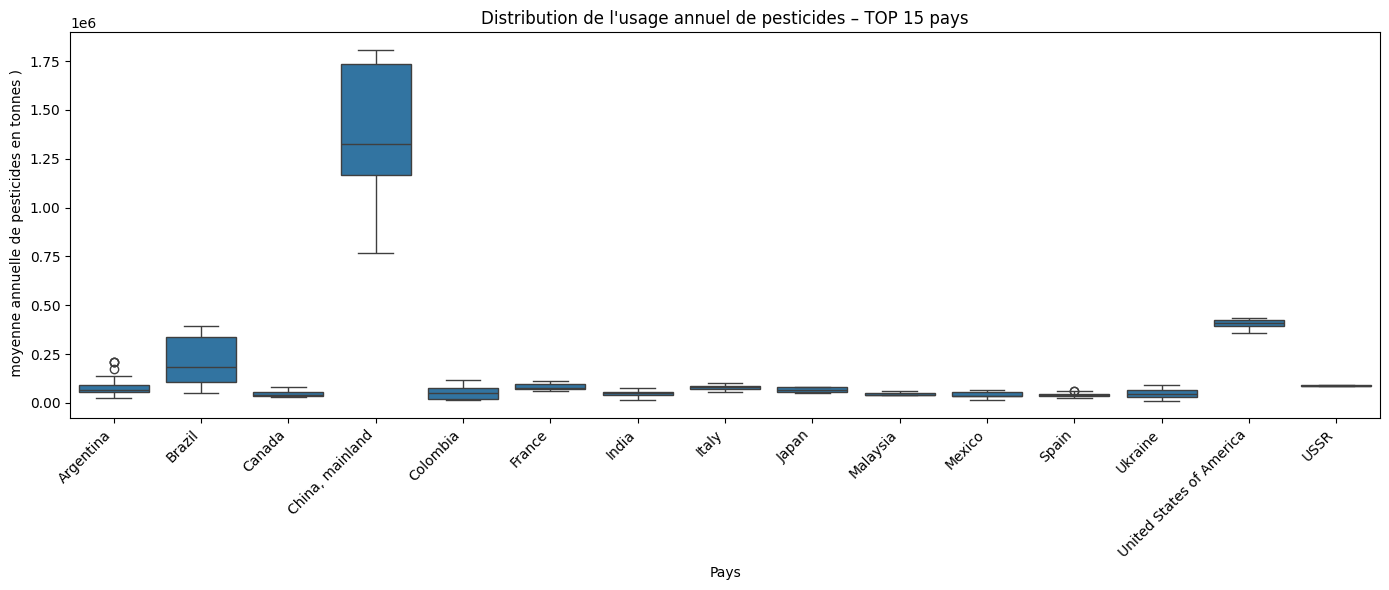

In [16]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x="Area", y="Value")

plt.title("Distribution de l'usage annuel de pesticides – TOP 15 pays")
plt.xlabel("Pays")
plt.ylabel(" moyenne annuelle de pesticides en tonnes )")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

La chine ressort comme le pays le plus utilisateur de pesticides. Mais cela pourrait ne pas être un outlier et pourrait être normal car c'est un l'un des plus gros producteur agricoles au monde, et c'est également un grand pays en terme de superficie.

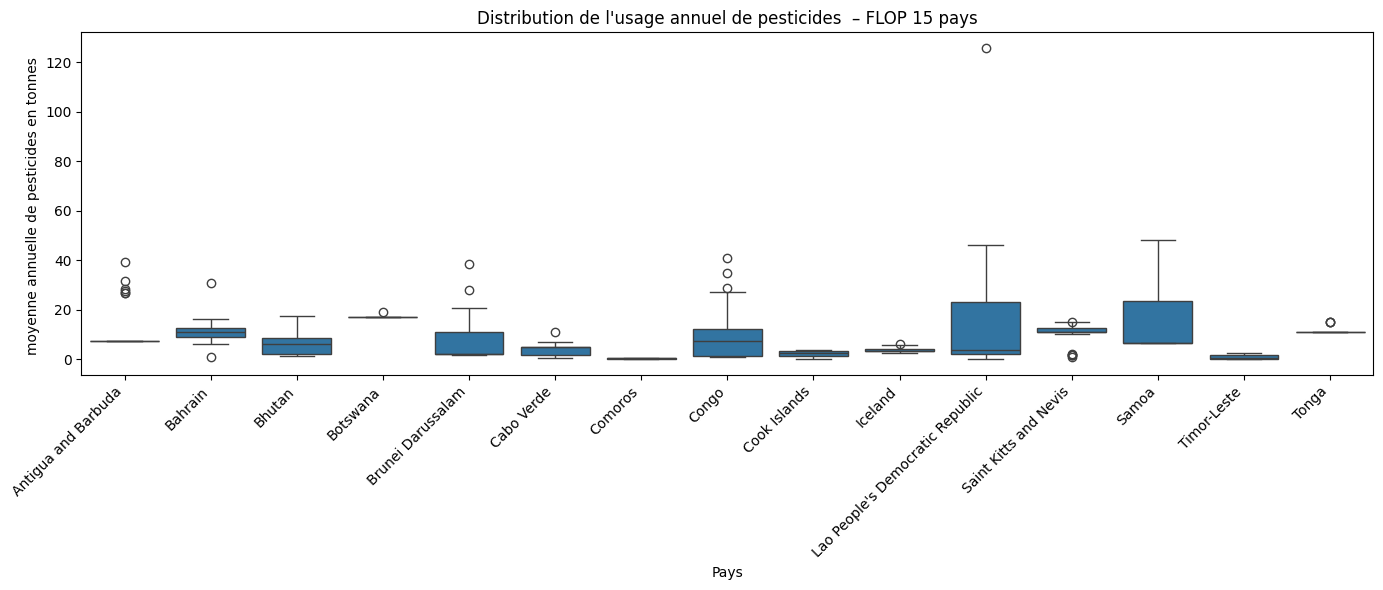

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_flop, x="Area", y="Value")

plt.title("Distribution de l'usage annuel de pesticides  – FLOP 15 pays")
plt.xlabel("Pays")
plt.ylabel("moyenne annuelle de pesticides en tonnes ")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Les pays les moins utilisateurs de pesticides ne sont pas surprenants, car ce sont des petits pays ou îles, qui n'ont pas beaucoup de ressources ou de potentiel agricole.

**⚠️ Remarques relevées sur le DF pesticides :**

 - Présence de colonnes à valeur unique qui n'apporte aucune information pertinente donc à supprimer : 
    Colonnes à valeur unique :
    - Domain : Pesticides Use
    - Element : Use
    - Item : Pesticides (total)
    - Unit : tonnes of active ingredients




  - Harmoniser les noms de pays ( transformer en miniscule, et vérificationd des noms de pays)
  - Période enregistrée : 1990 à 2016

## Analyse du DF Rain 

In [18]:
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [19]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


❌ Les valeurs de average_rain_fall_mm_per_year sont en "object" il faudra les transformer en type numérique.

In [20]:
rain.isnull().sum()

 Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

❌ Il y a 774 valeurs nulles. à voir comment les gérer en fonction de la fusion avec les autres datasets

In [21]:
rain.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


Période enregistrée : 1985 à 2017

In [22]:
RainNan = rain[rain.isna().any(axis=1)]
RainNan.head()

,Area,Year,average_rain_fall_mm_per_year
93,American Samoa,1985,NaN
94,American Samoa,1986,NaN
95,American Samoa,1987,NaN
96,American Samoa,1989,NaN
97,American Samoa,1990,NaN


In [23]:
print("❌ Liste des pays ayant des valeurs de pluie nulles : ")
RainNan[" Area"].value_counts()

❌ Liste des pays ayant des valeurs de pluie nulles : 


 Area
American Samoa               31
Aruba                        31
Turks and Caicos Islands     31
Tonga                        31
St. Martin (French part)     31
Sint Maarten (Dutch part)    31
San Marino                   31
Northern Mariana Islands     31
New Caledonia                31
Macao SAR, China             31
Kosovo                       31
Isle of Man                  31
Hong Kong SAR, China         31
Guam                         31
Greenland                    31
Gibraltar                    31
French Polynesia             31
Faroe Islands                31
Curacao                      31
Channel Islands              31
Cayman Islands               31
British Virgin Islands       31
Bermuda                      31
Virgin Islands (U.S.)        31
Monaco                       30
Name: count, dtype: int64

In [24]:
# Compter combien de fois chaque pays apparaît
counts = rain[" Area"].value_counts()

# Afficher uniquement les pays de la liste
countries = [
    "American Samoa", "Aruba", "Turks and Caicos Islands", "Tonga",
    "St. Martin (French part)", "Sint Maarten (Dutch part)", "San Marino",
    "Northern Mariana Islands", "New Caledonia", "Macao SAR, China",
    "Kosovo", "Isle of Man", "Hong Kong SAR, China", "Guam", "Greenland",
    "Gibraltar", "French Polynesia", "Faroe Islands", "Curacao",
    "Channel Islands", "Cayman Islands", "British Virgin Islands",
    "Bermuda", "Virgin Islands (U.S.)", "Monaco"
]

counts[countries]

counts_df = rain.groupby(" Area").size().reset_index(name="count")

# Filtrer les pays de ta liste
counts_df[counts_df[" Area"].isin(countries)]

#Donc supprimer tous les Nan du Dataframe rain 


,Area,count
3,American Samoa,31
9,Aruba,31
21,Bermuda,31
27,British Virgin Islands,31
36,Cayman Islands,31
39,Channel Islands,31
50,Curacao,31
65,Faroe Islands,31
69,French Polynesia,31
75,Gibraltar,31


**⚠️Remarques sur le dataset Rain** : 

- Les valeurs de average_rain_fall_mm_per_year sont en "object" il faudra les transformer en type numérique.

- il y a 774 valeurs nulles. à voir comment les gérer en fonction de la fusion avec les autres datasets.

- Harmoniser les noms des pays.

- Période enregistrée : 1985 à 2017

## Analyse du DF Température

In [25]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [26]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


❌ Il existe des valeurs non nulles pour la température moyenne.

In [27]:
tempNan = temp[temp.isna().any(axis=1)]
print ( "DF contenant que les informations manquantes au niveau de avg_temp")
tempNan.info()

DF contenant que les informations manquantes au niveau de avg_temp
<class 'pandas.core.frame.DataFrame'>
Index: 2547 entries, 3 to 71145
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2547 non-null   int64  
 1   country   2547 non-null   object 
 2   avg_temp  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.6+ KB


In [28]:
temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


Période enregistrée : 1743 à 2013

In [29]:
tempNan["country"].value_counts()

country
United States    381
India            236
Pakistan         168
Indonesia        167
Brazil           115
                ... 
Afghanistan        2
Lebanon            2
Iran               1
Iraq               1
Jamaica            1
Name: count, Length: 113, dtype: int64

**⚠️Remarques retenues sur le Dataset Temp :**
- 2547 de valeurs avg_temp manquante.
- Noms de pays à harmoniser
- Période enregistrée : 1743 à 2013 ( très longue période)

## Analyse du DF yield.csv 

In [30]:
yld.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [31]:
yld.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

❌ Noms de colonnes à harmoniser

In [32]:
print("Colonnes à valeur unique :")
for col in yld.columns:
    val_unique = yld[col].nunique()
    if val_unique == 1:
        print(f"  - {col} : {yld[col].unique()[0]}")

Colonnes à valeur unique :
  - Domain Code : QC
  - Domain : Crops
  - Element Code : 5419
  - Element : Yield
  - Unit : hg/ha


❌ colonnes à valeur unique, sans valeur ajoutée, à supprimer du Dataset.

In [33]:
yld.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


❌Area code : vérifier si chaque pays dispose d'un area code distinct. si c'est le cas, généraliser le Area code aux autres Datasets.

❌Vérifier la valeur max de value 1000000.000000

❌supprimer les value à 0 car aucune valeur ajoutée.

Période enregistrée de 1961 à 2016.

In [34]:
yld.groupby(['Area', 'Area Code']).size().reset_index(name='count')
# On dirait qu'on a un code par pays. point à creuser.

,Area,Area Code,count
0,Afghanistan,2,224
1,Albania,3,270
2,Algeria,4,279
3,American Samoa,5,112
4,Angola,7,370
...,...,...,...
207,Wallis and Futuna Islands,243,112
208,Yemen,249,254
209,Yugoslav SFR,248,186
210,Zambia,251,429


⚠️ On dirait qu'on a un code par pays. point à creuser.

In [35]:
yld.groupby(['Item', 'Item Code']).size().reset_index(name='count')


,Item,Item Code,count
0,Cassava,125,5718
1,Maize,56,8631
2,Plantains and others,489,2654
3,Potatoes,116,7876
4,"Rice, paddy",27,6469
5,Sorghum,83,5511
6,Soybeans,236,4192
7,Sweet potatoes,122,6356
8,Wheat,15,6160
9,Yams,137,3150


on a un Item code par Item. à voir s'il y a un intéret de garder Item code au lieu de Item.

In [36]:
yld.loc[yld["Value"] >= 500000, :]



,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
3657,QC,Crops,255,Belgium,5419,Yield,116,Potatoes,2011,2011,hg/ha,501412
3660,QC,Crops,255,Belgium,5419,Yield,116,Potatoes,2014,2014,hg/ha,540003
3755,QC,Crops,15,Belgium-Luxembourg,5419,Yield,116,Potatoes,1997,1997,hg/ha,522291
3892,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2000,2000,hg/ha,507074
3901,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2009,2009,hg/ha,554855
27930,QC,Crops,114,Kenya,5419,Yield,489,Plantains and others,1964,1964,hg/ha,1000000
47380,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1979,1979,hg/ha,533236
47381,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1980,1980,hg/ha,578976


Nous affichons les valeurs les plus élevées de rendements pour voir si c'est des erreurs, outliers ou des vraies valeurs.

In [37]:
yld.loc[(yld["Area"] == "Kenya") & (yld["Item"] == "Plantains and others"),"Value"].mean()

np.float64(135177.7857142857)

pour la valeur la plus élevée du Rendement pour ce Dataset, en faisant la moyenne des rendement pour le pays et Item concerné, il semble que c'est un outlier ou erreur de saisie. car la moyenne de rendement des Plantains and others au Kenya est de 135177 hg/ha en moyenne. ce qui est très loin de la valeur identifiée.

❌ valeur à supprimer

In [38]:
print( "La moyenne et l'écart type du rendement des Potatoes en Belgique : " )
print(yld.loc[(yld["Area"] == "Belgium") & (yld["Item"] == "Potatoes"),"Value"].mean())
print(yld.loc[(yld["Area"] == "Belgium") & (yld["Item"] == "Potatoes"),"Value"].std())

La moyenne et l'écart type du rendement des Potatoes en Belgique : 
450104.0588235294
39846.189473509556


la moyenne de production de potatoes par la belgique est de 450104. ce qui est cohérent avec les valeurs affichés. donc pas d'outlier.

In [39]:
print ( "La moyenne de rendement des Plantains and others à Belize : ")
print(yld.loc[(yld["Area"] == "Belize") & (yld["Item"] == "Plantains and others"),"Value"].mean())
print("l'écart type : ")
print(yld.loc[(yld["Area"] == "Belize") & (yld["Item"] == "Plantains and others"),"Value"].std())


La moyenne de rendement des Plantains and others à Belize : 
273483.5
l'écart type : 
126611.01974727336


In [40]:
print ( " Nous explorons les valeurs de rendements maximales du Belize pour les Plantains and others : ")
yld.loc[(yld["Area"] == "Belize") & (yld["Item"] == "Plantains and others") &(yld["Value"] >= 300000)]

 Nous explorons les valeurs de rendements maximales du Belize pour les Plantains and others : 


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
3884,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,1992,1992,hg/ha,362982
3885,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,1993,1993,hg/ha,382491
3886,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,1994,1994,hg/ha,405405
3887,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,1995,1995,hg/ha,488289
3888,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,1996,1996,hg/ha,480175
3892,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2000,2000,hg/ha,507074
3893,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2001,2001,hg/ha,323383
3898,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2006,2006,hg/ha,356557
3900,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2008,2008,hg/ha,352212
3901,QC,Crops,23,Belize,5419,Yield,489,Plantains and others,2009,2009,hg/ha,554855


Les valeurs extrêmes pourraient correspondre à des années exceptionnelles en terme de rendement. mais ce n'est pas visiblement pas des outliers.

In [41]:
print( "la moyenne et écart type des rendement de Plantains au Sri Lanka" )
print(yld.loc[(yld["Area"] == "Sri Lanka") & (yld["Item"] == "Plantains and others"), "Value"].mean())
print(yld.loc[(yld["Area"] == "Sri Lanka") & (yld["Item"] == "Plantains and others"), "Value"].std())

la moyenne et écart type des rendement de Plantains au Sri Lanka
162004.17857142858
103068.01464119033


In [42]:
yld.loc[(yld["Area"] == "Sri Lanka") & (yld["Item"] == "Plantains and others") & (yld["Value"] >= 200000)]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
47367,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1966,1966,hg/ha,218190
47368,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1967,1967,hg/ha,230162
47376,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1975,1975,hg/ha,274740
47377,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1976,1976,hg/ha,256207
47378,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1977,1977,hg/ha,272344
47379,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1978,1978,hg/ha,264088
47380,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1979,1979,hg/ha,533236
47381,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1980,1980,hg/ha,578976
47382,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1981,1981,hg/ha,403038
47383,QC,Crops,38,Sri Lanka,5419,Yield,489,Plantains and others,1982,1982,hg/ha,308211


Nous remarquons que pendant 3 années consécutives, le SRI LANKA a eu un rendement élevé. Nous gardons ces valeurs à ce stade.

In [43]:
yld.loc[(yld["Value"] == 0)]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
35804,QC,Crops,153,New Caledonia,5419,Yield,83,Sorghum,2000,2000,hg/ha,0
35806,QC,Crops,153,New Caledonia,5419,Yield,83,Sorghum,2012,2012,hg/ha,0
35906,QC,Crops,153,New Caledonia,5419,Yield,15,Wheat,2000,2000,hg/ha,0
35908,QC,Crops,153,New Caledonia,5419,Yield,15,Wheat,2002,2002,hg/ha,0
35912,QC,Crops,153,New Caledonia,5419,Yield,15,Wheat,2006,2006,hg/ha,0
35913,QC,Crops,153,New Caledonia,5419,Yield,15,Wheat,2007,2007,hg/ha,0
35914,QC,Crops,153,New Caledonia,5419,Yield,15,Wheat,2011,2011,hg/ha,0
37860,QC,Crops,299,Occupied Palestinian Territory,5419,Yield,83,Sorghum,1999,1999,hg/ha,0


❌ Valeurs de Rendements à 0 à supprimer du Dataset.

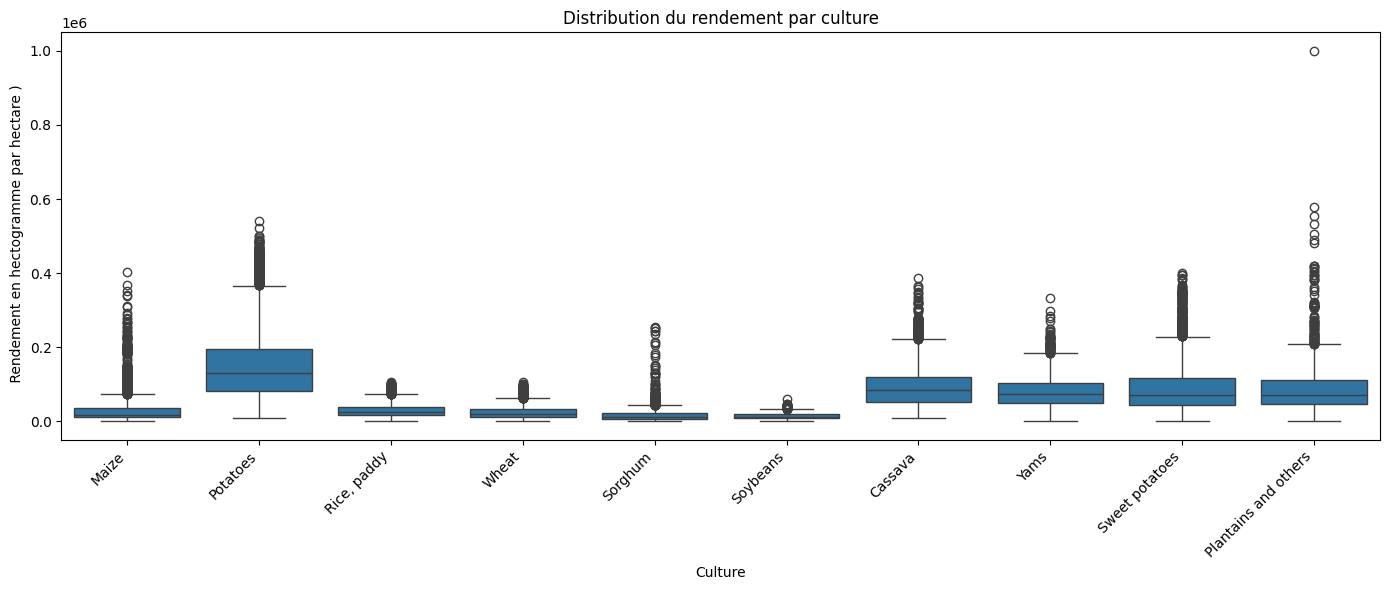

In [44]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=yld, x="Item", y="Value")

plt.title("Distribution du rendement par culture")
plt.xlabel("Culture")
plt.ylabel(" Rendement en hectogramme par hectare )")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

❌ Nous devons traiter les outliers.

⚠️ Remarques pour le Dataset Yield.csv : 

- Noms de colonnes à harmoniser

- colonnes à valeur unique, sans valeur ajoutée, à supprimer du Dataset.

- Area code : vérifier si chaque pays dispose d'un area code distinct. si c'est le cas, généraliser le Area code aux autres Datasets

- Vérifier la valeur max de value 1000000.000000

- supprimer les value à 0 car aucune valeur ajoutée.

- Période enregistrée de 1961 à 2016.

- On a un Item code par Item. à voir s'il y a un intéret de garder Item code au lieu de Item.

- Valeurs de Rendements à 0 à supprimer du Dataset.

- Outliers de rendements à traiter

- Valeur maximale de rendement du Kenya à supprimer

## Analyse du DF yield_df.csv

In [45]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [46]:
yield_df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Absence de valeur manquante

In [47]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


❌ Supprimer la colonne Unnamed: 0


In [48]:
yield_df.groupby(['Area']).size().reset_index(name='count')

,Area,count
0,Albania,99
1,Algeria,114
2,Angola,164
3,Argentina,368
4,Armenia,63
...,...,...
96,Ukraine,126
97,United Kingdom,230
98,Uruguay,161
99,Zambia,184


In [49]:
yield_df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


Période de 1990 à 2013.
vérifier les valeurs max de Rendement, pluie, pesticides et température.

In [50]:
yield_df.loc[yield_df["hg/ha_yield"]>= 500000]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2470,2470,Belgium,Potatoes,2011,501412,847.0,5740.44,11.69


Valeur validée dans l'analyse précédente, car la belgique est un gros producteur de Potatoes.

In [51]:
yield_df.loc[(yield_df["pesticides_tonnes"]== 367778) & (yield_df["Area"] == "Brazil") ]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
4720,4720,Brazil,Cassava,2013,140795,1761.0,367778.0,21.59
4721,4721,Brazil,Cassava,2013,140795,1761.0,367778.0,20.07
4722,4722,Brazil,Cassava,2013,140795,1761.0,367778.0,17.57
4723,4723,Brazil,Cassava,2013,140795,1761.0,367778.0,17.57
4724,4724,Brazil,Cassava,2013,140795,1761.0,367778.0,27.71
...,...,...,...,...,...,...,...,...
4814,4814,Brazil,Yams,2013,96078,1761.0,367778.0,27.11
4815,4815,Brazil,Yams,2013,96078,1761.0,367778.0,17.84
4816,4816,Brazil,Yams,2013,96078,1761.0,367778.0,26.40
4817,4817,Brazil,Yams,2013,96078,1761.0,367778.0,25.19


Il semble que toutes les lignes max d'usage de pesticide concerne le Brazil. cela pourrait donc ne pas être une valeur abérrante.

In [52]:
yield_df.loc[(yield_df["average_rain_fall_mm_per_year"]== 3240) &(yield_df["Area"]== "Colombia") ]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
6521,6521,Colombia,Cassava,1990,93532,3240.0,18058.29,27.22
6522,6522,Colombia,Cassava,1990,93532,3240.0,18058.29,22.40
6523,6523,Colombia,Maize,1990,14498,3240.0,18058.29,27.22
6524,6524,Colombia,Maize,1990,14498,3240.0,18058.29,22.40
6525,6525,Colombia,Plantains and others,1990,71514,3240.0,18058.29,27.22
...,...,...,...,...,...,...,...,...
6930,6930,Colombia,Soybeans,2013,27250,3240.0,54563.38,22.85
6931,6931,Colombia,Wheat,2013,16938,3240.0,54563.38,27.60
6932,6932,Colombia,Wheat,2013,16938,3240.0,54563.38,22.85
6933,6933,Colombia,Yams,2013,109992,3240.0,54563.38,27.60


Toutes les valeurs max de pluie concernent la colombie qui est un pays tropical.
Ce ne sont donc pas des valeurs abérrantes.

In [53]:
yield_df.loc[(yield_df["avg_temp"]>=30.5)]


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
25881,25881,Sudan,Maize,2013,15997,1712.0,2469.47,30.65
25883,25883,Sudan,Potatoes,2013,166669,1712.0,2469.47,30.65
25885,25885,Sudan,"Rice, paddy",2013,33060,1712.0,2469.47,30.65
25887,25887,Sudan,Sorghum,2013,6390,1712.0,2469.47,30.65
25889,25889,Sudan,Sweet potatoes,2013,213626,1712.0,2469.47,30.65
25891,25891,Sudan,Wheat,2013,19534,1712.0,2469.47,30.65
25893,25893,Sudan,Yams,2013,21053,1712.0,2469.47,30.65


Les températures ne semblent pas être abérrantes comme le soudan est pays composé majoritairement de désert.

In [54]:
corr_yield_df = yield_df.select_dtypes(include = "number").corr()
corr_yield_df

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Unnamed: 0,1.000000,0.043850,0.013395,-0.228755,-0.316017,-0.051584
Year,0.043850,1.000000,0.091630,-0.003798,0.140930,0.014409
hg/ha_yield,0.013395,0.091630,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,-0.228755,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,-0.316017,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,-0.051584,0.014409,-0.114777,0.313040,0.030946,1.000000


Nous notons l'absence de toute forte corrélation entre les différentes variables.

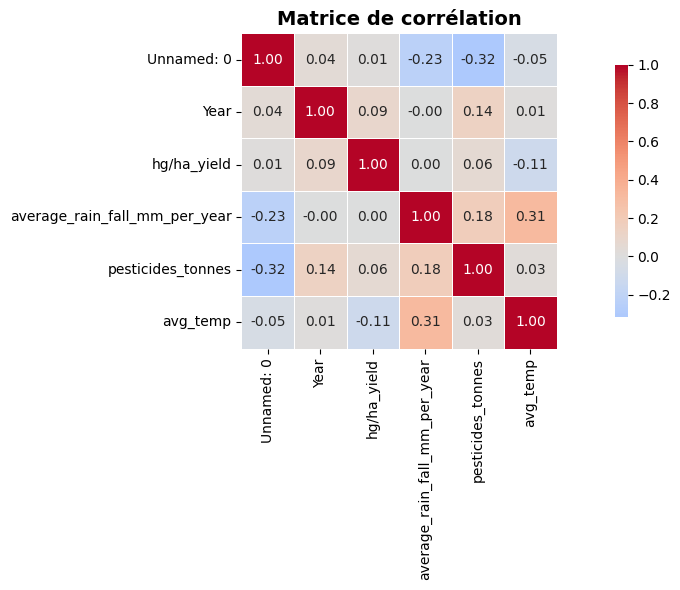

In [55]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_yield_df,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Matrice de corrélation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

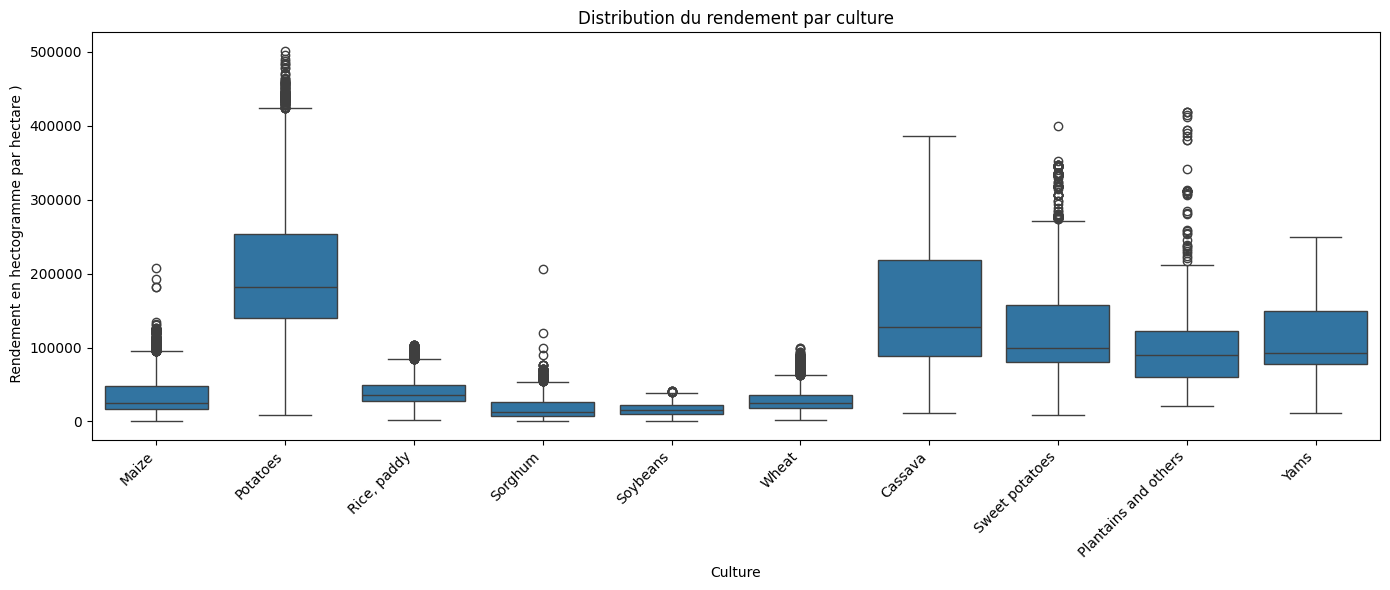

In [56]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=yield_df, x="Item", y="hg/ha_yield")

plt.title("Distribution du rendement par culture")
plt.xlabel("Culture")
plt.ylabel(" Rendement en hectogramme par hectare )")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

❌ Nous relevons des outliers par culture à traiter.

**⚠️ Remarques retenues :**

- Supprimer colonne Unnamed.

- Harmoniser les noms de colonnes

- Traiter les outliers par culture.

## Analyse du DF Crop_yield.csv : 

In [57]:
crop_yield.head()

# sur ce df, il manque les années, on ne sait pas la Data a été collectée sur combien de temps.
# il manque aussi les pays. je ne sais pas si c'est sur un seul pays ou au niveau mondial avec Region = regions du monde.
# les autres variable sont intéressantes.

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [58]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


Absence de case manquante

In [59]:
crop_yield.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


Vérifier Les valeurs extrêmes et supprimer la valeur négatives ou nulles de Yield_tons_per_hectare

In [60]:
crop_yield.loc[crop_yield["Yield_tons_per_hectare"]<=0]

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
756,East,Peaty,Cotton,101.019421,33.804131,False,False,Rainy,117,-0.007103
7799,South,Chalky,Rice,108.804894,18.004082,False,False,Sunny,86,-0.061283
8421,East,Chalky,Soybean,168.120735,38.473430,False,False,Cloudy,111,-0.119911
9553,North,Silt,Wheat,156.607973,16.610257,False,False,Sunny,129,-0.193093
15435,South,Chalky,Maize,177.481344,27.719742,False,False,Sunny,94,-0.009811
...,...,...,...,...,...,...,...,...,...,...
975666,South,Clay,Barley,116.114046,16.257818,False,False,Sunny,70,-0.471038
982738,West,Loam,Wheat,235.792353,31.699429,False,False,Sunny,68,-0.255772
987054,West,Peaty,Barley,100.467398,15.735951,False,False,Rainy,96,-0.120282
995837,East,Chalky,Maize,105.575189,15.864764,False,False,Rainy,111,-0.051633


❌ 231 valeurs à supprimer car ce n'est pas possible d'avoir un rendement nul ou négatif.

In [61]:
for col in crop_yield.select_dtypes(include="object").columns:
    print(f"\nColonne : {col}")
    display(crop_yield[col].value_counts())


Colonne : Region


Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64


Colonne : Soil_Type


Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64


Colonne : Crop


Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64


Colonne : Weather_Condition


Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64

❌ Nous remarquons que l'ensemble des colonnes catégorielles ont une distribution uniforme.

Cela ne nous apprendra donc rien par rapport à notre Analyse.

Nous allons être amené à supprimer ces colonnes sauf la colonne Crop car indispensable à la prédiction.

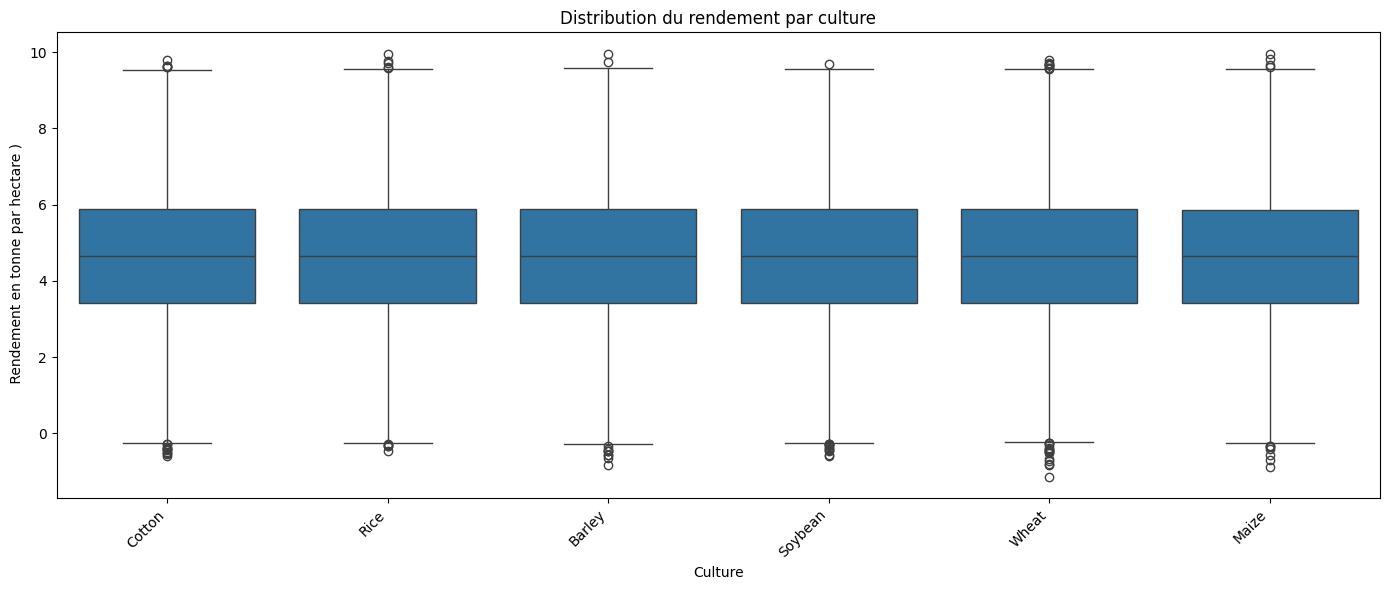

In [62]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=crop_yield, x="Crop", y="Yield_tons_per_hectare")

plt.title("Distribution du rendement par culture")
plt.xlabel("Culture")
plt.ylabel(" Rendement en tonne par hectare )")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

❌ Il existe des outliers par culture à traiter.

❌ Rendement à harmoniser avec les autres DF car ici en tonne et en hg/ha sur les autres datasets.


In [63]:
corr_crop_yield = crop_yield.select_dtypes(include = "number").corr()
corr_crop_yield

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,-0.000731,0.085565
Days_to_Harvest,-0.002669,-0.000731,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,-0.002591,1.000000


❌ Days to harvest n'a une corrélation de −0.0026 donc aucune relation linéaire avec le rendement.
Le modèle n’en tirera aucune information prédictive.

In [64]:
crop_yield.groupby('Crop')['Days_to_Harvest'].mean()

Crop
Barley     104.425646
Cotton     104.533800
Maize      104.538927
Rice       104.500875
Soybean    104.455945
Wheat      104.514900
Name: Days_to_Harvest, dtype: float64

In [65]:
crop_yield.groupby('Crop')['Days_to_Harvest'].count()

Crop
Barley     166777
Cotton     166585
Maize      166824
Rice       166792
Soybean    166349
Wheat      166673
Name: Days_to_Harvest, dtype: int64

❌ Days to harvest a également une ditribution uniforme par variable. Cela confirme la suppression de la variable car elle n'apporte aucune information utile de prédictive.

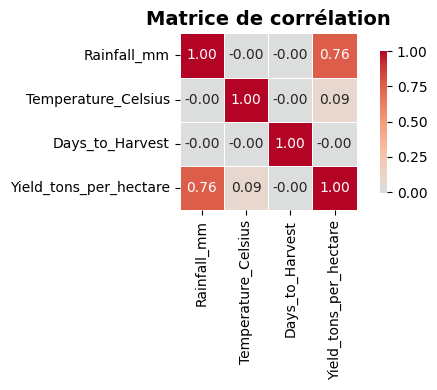

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_crop_yield,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Matrice de corrélation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Nous notons une corrélation assez élevée entre la pluviométrie et le rendement.
Aucune autre forte corrélation notée.

**⚠️ Remarques retenues :**

- 231 valeurs à supprimer car ce n'est pas possible d'avoir un rendement nul ou négatif.

- Nous remarquons que l'ensemble des colonnes catégorielles ont une distribution uniforme. Cela ne nous apprendra donc rien par rapport à notre Analyse. Nous allons être amené à supprimer ces colonnes sauf la colonne Crop car indispensable à la prédiction.

-  Il existe des outliers par culture à traiter.

- Rendement à harmoniser avec les autres DF car ici en tonne et en hg/ha sur les autres datasets.

## Application des prétraitements et remarques notées : 

### DF Rain : 

In [67]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


Transformation de average_rain_fall_mm_per_year de object à numeric : 

In [68]:
rain["average_rain_fall_mm_per_year"] = pd.to_numeric(
    rain["average_rain_fall_mm_per_year"],
    errors="coerce"
)

Harmoniser les noms de colonnes /   pays : 

In [69]:
rain = rain.rename(columns= {' Area' : "area",
                             "Year" : "year"})

In [70]:
rain["area"] = rain["area"].str.strip() # supprimer les espaces
rain["area"] = rain["area"].str.lower()   # minuscules
rain["area"] = rain["area"].str.replace("’", "'")  # apostrophe typographique -> ascii

In [71]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area                           6727 non-null   object 
 1   year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [72]:
rain.head()

,area,year,average_rain_fall_mm_per_year
0,afghanistan,1985,327.0
1,afghanistan,1986,327.0
2,afghanistan,1987,327.0
3,afghanistan,1989,327.0
4,afghanistan,1990,327.0


### DF Temp :

In [73]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


Harmoniser nom de colonne Area : 

In [74]:
temp = temp.rename(columns={"country" : "area"})

In [75]:
temp["area"] = temp["area"].str.strip() # supprimer les espaces
temp["area"] = temp["area"].str.lower()   # minuscules
temp["area"] = temp["area"].str.replace("’", "'")  # apostrophe typographique -> ascii

In [76]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [77]:
temp.head()

,year,area,avg_temp
0,1849,côte d'ivoire,25.58
1,1850,côte d'ivoire,25.52
2,1851,côte d'ivoire,25.67
3,1852,côte d'ivoire,NaN
4,1853,côte d'ivoire,NaN


### DF Pesticides : 

In [78]:
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


Suppression de colonnes inutiles : 

In [79]:
pesticides=pesticides.drop(columns=["Domain", "Element", "Item", "Unit"])

In [80]:
pesticides = pesticides.rename(columns={
    "Value" : "tonnes_pesticides",
    "Area" : "area",
    "Year":"year"})

In [81]:
pesticides["area"] = pesticides["area"].str.strip() # supprimer les espaces
pesticides["area"] = pesticides["area"].str.lower()   # minuscules
pesticides["area"] = pesticides["area"].str.replace("’", "'")  # apostrophe typographique -> ascii

In [82]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               4349 non-null   object 
 1   year               4349 non-null   int64  
 2   tonnes_pesticides  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB


### DF Yield.csv :

In [83]:
yld.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


Supprimer les colonnes à valeur unique : 

In [84]:
yld = yld.drop(columns=['Domain Code', 'Domain','Element Code', 'Element', 'Year Code','Unit'])

In [85]:
yld = yld.rename(columns={"Area Code" : "area_code",
                          "Area" : "area",
                         'Item Code' : "item_code",
                         'Item' : "item",
                         'Year' : "year",
                         'Value' : "value_hg/ha" })

In [86]:
yld["area"] = yld["area"].str.strip() # supprimer les espaces
yld["area"] = yld["area"].str.lower()   # minuscules
yld["area"] = yld["area"].str.replace("’", "'")   # minuscules


In [87]:
yld.shape

(56717, 6)

In [88]:
yld = yld[yld["value_hg/ha"] != 0]

In [89]:
yld = yld[yld["value_hg/ha"] != 1000000]

In [90]:
yld.shape

(56708, 6)

In [91]:
yld.head()

,area_code,area,item_code,item,year,value_hg/ha
0,2,afghanistan,56,Maize,1961,14000
1,2,afghanistan,56,Maize,1962,14000
2,2,afghanistan,56,Maize,1963,14260
3,2,afghanistan,56,Maize,1964,14257
4,2,afghanistan,56,Maize,1965,14400


### DF yield_df.csv

In [92]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [93]:
yield_df = yield_df.drop(columns = "Unnamed: 0")

In [94]:
yield_df = yield_df.rename(columns={"Area" : "area",
                                      "Year" : "year",
                                      "Item" : "item",
                                      "average_rain_fall_mm_per_year" : "avg_rain_mm"})

In [95]:
yield_df["area"] = yield_df["area"].str.strip() # supprimer les espaces
yield_df["area"] = yield_df["area"].str.lower() # met tout en miniscule
yield_df["area"] = yield_df["area"].str.replace("’", "'", regex=False)

In [96]:
yield_df["item"] = yield_df["item"].str.strip() # supprimer les espaces
yield_df["item"] = yield_df["item"].str.lower() # met tout en miniscule

In [97]:
yield_df.head()

,area,item,year,hg/ha_yield,avg_rain_mm,pesticides_tonnes,avg_temp
0,albania,maize,1990,36613,1485.0,121.0,16.37
1,albania,potatoes,1990,66667,1485.0,121.0,16.37
2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37
3,albania,sorghum,1990,12500,1485.0,121.0,16.37
4,albania,soybeans,1990,7000,1485.0,121.0,16.37


### Crop_yield.csv

In [98]:
crop_yield.shape

(1000000, 10)

In [99]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Nous supprimons les valeurs de rendements négatives : 

In [100]:
crop_yield = crop_yield[crop_yield["Yield_tons_per_hectare"] > 0]

In [101]:
crop_yield.shape

(999769, 10)

Comme les colonnes catégorielles ont une distribution uniforme et ne nous aprennent rien de constructif, nous allons les supprimer : 

In [102]:
crop_yield = crop_yield.drop(columns=["Region", "Soil_Type", "Weather_Condition" ])

In [103]:
crop_yield = crop_yield.drop(columns=["Days_to_Harvest" ])

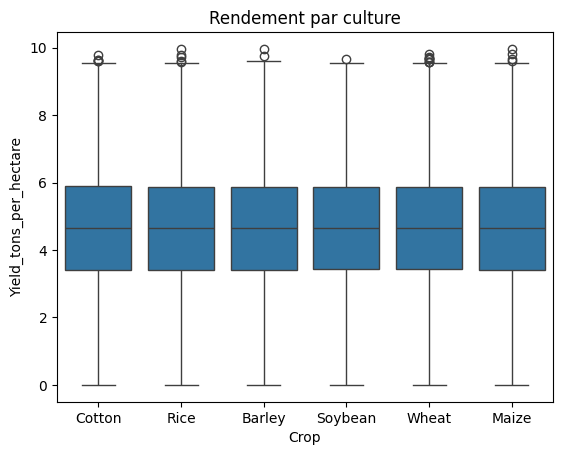

In [104]:
sns.boxplot(data=crop_yield, x='Crop', y='Yield_tons_per_hectare')
plt.title("Rendement par culture")
plt.show()

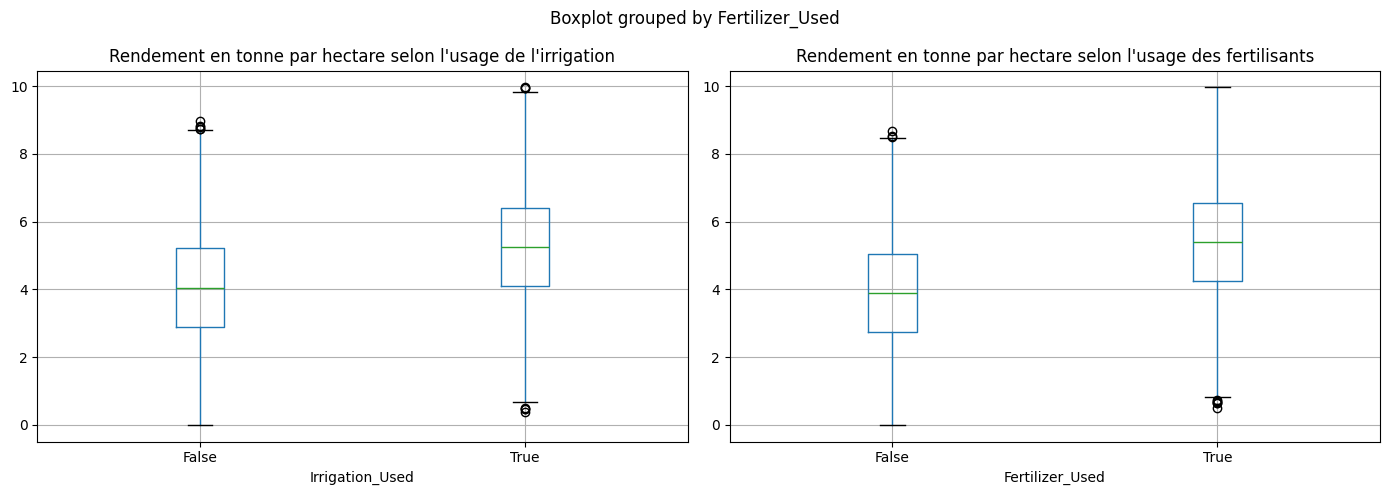

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Irrigation
crop_yield.boxplot(column='Yield_tons_per_hectare', by='Irrigation_Used', ax=axes[0])
axes[0].set_title("Rendement en tonne par hectare selon l'usage de l'irrigation")

# Fertilizer  
crop_yield.boxplot(column='Yield_tons_per_hectare', by='Fertilizer_Used', ax=axes[1])
axes[1].set_title("Rendement en tonne par hectare selon l'usage des fertilisants")

plt.tight_layout()
plt.show()

Nous remarquons que l'utilisation des fertilisants et de l'irrigation a un impact notable sur la productivité.

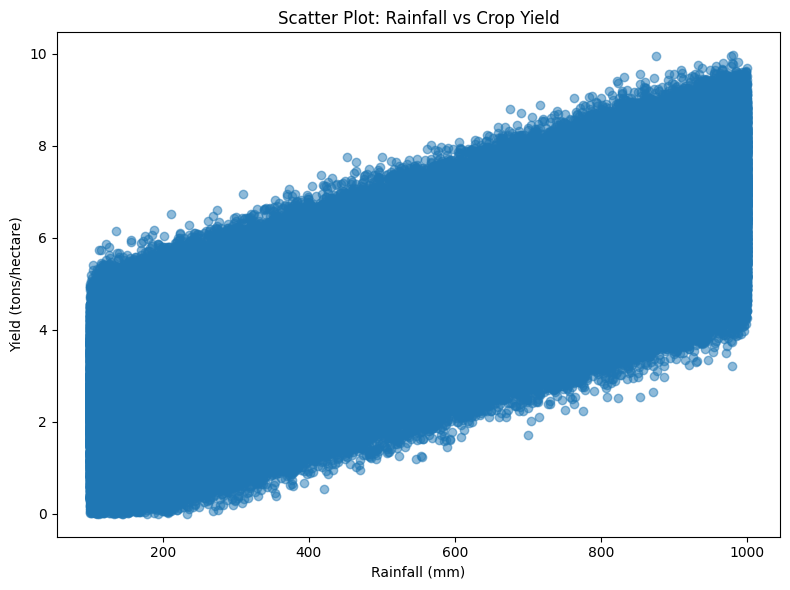

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(crop_yield['Rainfall_mm'], crop_yield['Yield_tons_per_hectare'], alpha=0.5)
plt.title("Scatter Plot: Rainfall vs Crop Yield")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons/hectare)")
plt.tight_layout()

Nous notons la pluie a un fort impact sur le rendement comme nous l'avons constaté sur la corrélation.

Nous allons maintenant traiter les outliers : 

In [107]:
outliers_crop = []
crops = crop_yield["Crop"].unique()
for i in crops:
    subset = crop_yield[crop_yield["Crop"] == i]
    values = subset["Yield_tons_per_hectare"]
    
    Q1 = np.quantile(values, 0.25)
    Q3 = np.quantile(values, 0.75)
    iqr = Q3 - Q1
    
    lim_basse = Q1 - 1.5 * iqr
    lim_haute = Q3 + 1.5 * iqr
    
    # sélectionner les lignes outliers
    outliers_i = subset[(values < lim_basse) | (values > lim_haute)]
    
    outliers_crop.append(outliers_i)

# concaténer tous les outliers
outliers_crop_df= pd.concat(outliers_crop, ignore_index=True)

In [108]:
outliers_crop_df

,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,Cotton,956.623791,39.830278,True,True,9.647672
1,Cotton,967.070702,15.765251,True,True,9.786272
2,Cotton,998.332155,39.097651,True,True,9.604542
3,Cotton,984.835227,37.658089,True,True,9.612279
4,Cotton,966.192766,38.836694,True,True,9.643175
5,Rice,998.991449,22.513905,True,True,9.613384
6,Rice,977.530313,30.647480,True,True,9.721110
7,Rice,980.380130,26.385247,True,True,9.769839
8,Rice,980.537954,37.263468,True,True,9.963372
9,Rice,962.326093,36.830119,True,True,9.578900


comme il n'y a pas beaucoup d'outliers, et que nous allons juste les supprimer : 

In [109]:
crop_yield.shape

(999769, 6)

In [110]:
crop_yield= crop_yield.drop(outliers_crop_df.index)

In [111]:
crop_yield.shape

(999743, 6)

In [112]:
crop_yield.head()

,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
26,Wheat,615.349204,27.755632,True,False,4.876587
27,Barley,334.728576,31.137047,True,True,4.459294
28,Maize,259.418125,17.261892,False,False,2.338541
29,Wheat,786.770103,23.199371,True,True,6.937589
30,Maize,609.798764,38.265851,True,False,5.113588


###  Harmonisation des DF : 

In [113]:
dfs = [pesticides, temp, rain, yld, yield_df ]

countries = [set(df["area"].str.strip()) for df in dfs]

rows = []

for i, c in enumerate(countries):
    autres = set.union(*[countries[j] for j in range(len(countries)) if j != i])
    diff = c - autres

    for country in diff:
        rows.append({
            "country": country,
            "present_in_df": f"df{i+1}"
        })

diff_table = pd.DataFrame(rows)
diff_table

,country,present_in_df
0,"china, macao sar",df1
1,guinea bissau,df2
2,hong kong,df2
3,venezuela,df2
4,laos,df2
5,taiwan,df2
6,congo (democratic republic of the),df2
7,lao pdr,df3
8,isle of man,df3
9,northern mariana islands,df3


Harmonisation des noms de pays sur tous nos DF : 

In [114]:
country_mapping = {
    "china, macao sar": "china, macao sar",
    "hong kong": "china, hong kong sar",
    "taiwan": "china, taiwan province of",
    "laos": "lao people’s democratic republic",
    "venezuela": "venezuela (bolivarian republic of)",
    "guinea bissau": "guinea-bissau",
    "venezuela, rb": "venezuela (bolivarian republic of)",
    "cote d'ivoire": "côte d’ivoire",
    "hong kong sar, china": "china, hong kong sar",
    "congo, dem. rep.": "democratic republic of the congo",
    "congo (democratic republic of the)": "democratic republic of the congo",
    "micronesia": "micronesia (federated states of)",
    "st. kitts and nevis": "saint kitts and nevis",
    "west bank and gaza": "occupied palestinian territory",
    "lao pdr": "lao people’s democratic republic",
    "north korea": "democratic people’s republic of korea",
    "kyrgyz republic": "kyrgyzstan",
    "virgin islands (u.s.)": "united states virgin islands",
    "st. martin (french part)": "saint martin (french part)",
    "congo, rep.": "congo",
    "st. vincent and the grenadines": "saint vincent and the grenadines",
    "st. lucia": "saint lucia",
    "curacao": "curaçao",
    "macao sar, china": "china, macao sar",
    "slovak republic": "slovakia",
    "ethiopia pdr": "ethiopia",
    "bolivia": "bolivia (plurinational state of)",
    "états-unis": "united states of america",
    "united states": "united states of america",
    "usa": "united states of america",
    "syria": "syrian arab republic",
    "russia": "russian federation",
    "tanzania": "united republic of tanzania",
    "north korea": "democratic people’s republic of korea",
    "north_korea": "democratic people’s republic of korea",
    "iran": "iran (islamic republic of)",
    "moldova": "republic of moldova",
    "brunei": "brunei darussalam",
    "south korea": "republic of korea",
    "vietnam": "viet nam",
    "macedonia": "north macedonia",
    "north macedonia": "north macedonia",
    "myanmar": "myanmar",
    "burma": "myanmar",
    "cape verde": "cabo verde",
    "cabo verde": "cabo verde",
    "swaziland": "eswatini",
    "faeroe islands": "faroe islands",
    "czech republic": "czech republic",  # utile si vous voulez "forcer" une forme canonique
}

In [115]:
dfs = [pesticides, temp, rain, yld, yield_df]

for df in dfs:
    df.loc[:, "area"] = (
        df["area"]
        .str.lower()
        .replace(country_mapping)
    )

In [116]:
yld.head()

,area_code,area,item_code,item,year,value_hg/ha
0,2,afghanistan,56,Maize,1961,14000
1,2,afghanistan,56,Maize,1962,14000
2,2,afghanistan,56,Maize,1963,14260
3,2,afghanistan,56,Maize,1964,14257
4,2,afghanistan,56,Maize,1965,14400


In [117]:
# contrôle: détecter les areas avec plusieurs codes
check = yld.groupby("area")["area_code"].nunique()
ambiguous = check[check > 1]
if not ambiguous.empty:
    raise ValueError(f"Certaines areas ont plusieurs area_code: {ambiguous.index.tolist()}")

# mapping area -> area_code
area_to_code = df.drop_duplicates("area").set_index("area")["area_code"].to_dict()


ValueError: Certaines areas ont plusieurs area_code: ['ethiopia']

In [118]:
yld.loc[yld["area"] == "ethiopia", ["area", "area_code"]].drop_duplicates()

,area,area_code
17965,ethiopia,238
18157,ethiopia,62


On applique le bon code à l'Ethiopie qui est 238 : 

In [119]:
yld.loc[yld["area"] == "ethiopia", "area_code"] = 238

In [120]:
check = yld.groupby("area")["area_code"].nunique()
ambiguous = check[check > 1]
if not ambiguous.empty:
    raise ValueError(f"Certaines areas ont plusieurs area_code: {ambiguous.index.tolist()}")

# mapping area -> area_code
area_code_map = yld.drop_duplicates("area").set_index("area")["area_code"].to_dict()

Création de la colonne Area_code dans les autres DF : 

In [121]:
dfs = [pesticides, temp, rain, yield_df]  # mettez ici ceux à enrichir

for d in dfs:
    d.loc[:, "area_code"] = d["area"].map(area_code_map)

In [122]:
for d in dfs:
    missing = d.loc[d["area_code"].isna(), "area"].dropna().unique()
    if len(missing):
        print("areas sans code:", missing[:50])

areas sans code: ['china, macao sar']
areas sans code: ['czech republic' 'north macedonia' 'lao people’s democratic republic']
areas sans code: ['andorra' 'aruba' 'british virgin islands' 'channel islands'
 'côte d’ivoire' 'curaçao' 'czech republic' 'gibraltar' 'greenland'
 'isle of man' 'kiribati' 'democratic people’s republic of korea' 'kosovo'
 'lao people’s democratic republic' 'liechtenstein' 'china, macao sar'
 'north macedonia' 'marshall islands' 'monaco' 'nauru'
 'northern mariana islands' 'palau' 'san marino'
 'sint maarten (dutch part)' 'saint martin (french part)'
 'turks and caicos islands' 'tuvalu' 'united states virgin islands']


Extraire les codes manquants du side du FAO pour compléter les valeurs manquantes : 

In [123]:
area_code_manual = {
    "china, macao sar": 128,
    "czech republic": 167,
    "north macedonia": 154,
    "andorra": 6,
    "aruba": 22,
    "british virgin islands": 239,
    "channel islands": 259,
    "gibraltar": 82,
    "greenland": 85,
    "isle of man": 264,
    "kiribati": 83,
    "liechtenstein": 125,
    "marshall islands": 127,
    "monaco": 140,
    "nauru": 148,
    "northern mariana islands": 163,
    "palau": 180,
    "san marino": 192,
    "turks and caicos islands": 224,
    "tuvalu": 227,
    "united states virgin islands": 240,
    "lao people’s democratic republic" : 120,
    "democratic people’s republic of korea"	: 116,
    'côte d’ivoire' : 107
}


In [124]:
dfs = [pesticides, temp, rain, yield_df, yld]

for d in dfs:
    mask = d["area_code"].isna()
    d.loc[mask, "area_code"] = d.loc[mask, "area"].map(area_code_manual)


In [125]:
for d in dfs:
    missing = d.loc[d["area_code"].isna(), "area"].unique()
    if len(missing):
        print("encore sans code:", missing)
    else:
        print("ok, plus de valeurs manquantes")

ok, plus de valeurs manquantes
ok, plus de valeurs manquantes
encore sans code: ['curaçao' 'kosovo' 'sint maarten (dutch part)'
 'saint martin (french part)']
ok, plus de valeurs manquantes
ok, plus de valeurs manquantes


Pays sans area_code ne sont pas membre du FAO. donc à supprimer.

In [126]:
dfs = [pesticides, temp, rain, yield_df, yld]

for d in dfs:
    d.dropna(subset=["area_code"], inplace=True)

In [127]:
for d in dfs:
    missing = d.loc[d["area_code"].isna(), "area"].unique()
    print("restants sans code:", missing)

restants sans code: []
restants sans code: []
restants sans code: []
restants sans code: []
restants sans code: []


Il ne reste plus aucun pays sans area_code, ce qui facilitera la fusion.

Maintenant nous allons harmoniser les DF par dates : 

In [128]:
dfs_named = {
    "pesticides": pesticides,
    "temperature": temp,
    "rain": rain,
    "yield": yield_df,
    "yld": yld}
for name, d in dfs_named.items():
    print(f"{name} : {d['year'].min()} → {d['year'].max()}")
    print (f"{name} :{d.shape}")

pesticides : 1990 → 2016
pesticides :(4349, 4)
temperature : 1743 → 2013
temperature :(71311, 4)
rain : 1985 → 2017
rain :(6603, 4)
yield : 1990 → 2013
yield :(28242, 8)
yld : 1961 → 2016
yld :(56708, 6)


Nous remarquons que l'ensemble des datasets couvrent une période communes entre 1990 et 2013 soit 24 années.

Nous allons donc limiter notre étude à cette période qui est assez large et enregistre l'impact des évolutions technologiques sur le secteur et l'agriculture et également l'imapact du réchauffement climatique sur le climat mondial : 

In [129]:
pesticides = pesticides.loc[(pesticides["year"] >= 1990) & (pesticides["year"] <= 2013)]
temp = temp.loc[(temp["year"] >= 1990) & (temp["year"] <= 2013)]
rain = rain.loc[(rain["year"] >= 1990) & (rain["year"] <= 2013)]
yield_df = yield_df.loc[(yield_df["year"] >= 1990) & (yield_df["year"] <= 2013)]
yld = yld.loc[(yld["year"] >= 1990) & (yld["year"] <= 2013)]


### Traitement des outliers : 

In [130]:
yld.head()

,area_code,area,item_code,item,year,value_hg/ha
29,2,afghanistan,56,Maize,1990,17582
30,2,afghanistan,56,Maize,1991,16800
31,2,afghanistan,56,Maize,1992,15000
32,2,afghanistan,56,Maize,1993,16786
33,2,afghanistan,56,Maize,1994,16667


Rappel des outliers par culture : 

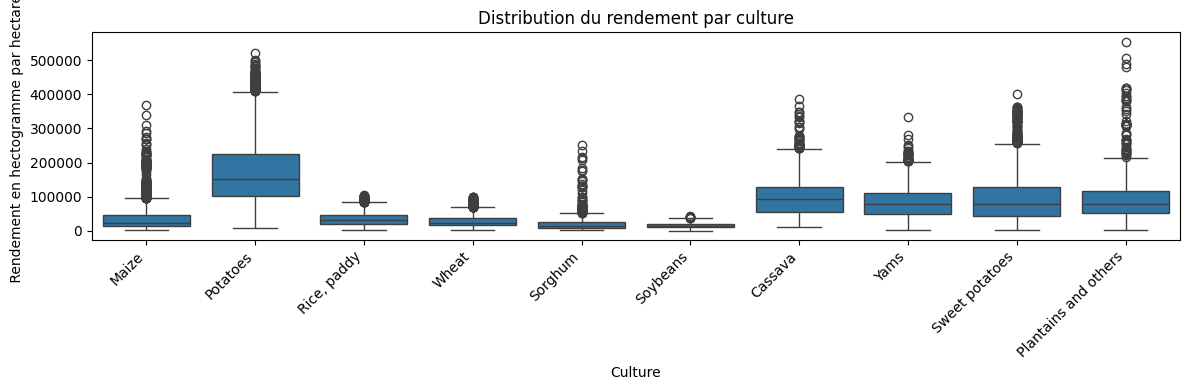

In [131]:
plt.figure(figsize=(12, 4))
sns.boxplot(yld, x="item", y="value_hg/ha")

plt.title("Distribution du rendement par culture")
plt.xlabel("Culture")
plt.ylabel(" Rendement en hectogramme par hectare )")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [132]:
print("\n=== RENDEMENT MOYEN PAR CULTURE ===")
print(yld.groupby('item')["value_hg/ha"].agg(['mean', 'median', 'std', 'min', 'max']))


=== RENDEMENT MOYEN PAR CULTURE ===
                               mean    median           std    min     max
item                                                                      
Cassava                98061.140386   93870.5  55219.886024  11024  385818
Maize                  36868.940699   23212.5  37352.194043    849  367619
Plantains and others   92940.896494   78507.5  70559.740653    286  554855
Potatoes              170611.864297  151026.5  97284.907920   8406  522291
Rice, paddy            34132.424595   30444.5  18916.436696   2034  103895
Sorghum                19454.389528   12500.0  20161.078353    578  252468
Soybeans               15402.373849   14701.0   7569.260153     50   41609
Sweet potatoes         95589.958737   76923.0  71390.187453   2211  400000
Wheat                  28365.918652   23313.0  18665.502405   1706   99387
Yams                   83539.312151   76605.5  46466.594108   1367  333333


On cherche à déterminer les outliers par item et pays pour s'assurer avant de les supprimer qu'on ne supprime pas des valeurs réelles qui pourraient fausser notre modélisation : 

In [133]:
outliers_rows = []
items = yld["item"].unique()
for i in items:
    subset = yld[yld["item"] == i]
    values = subset["value_hg/ha"]
    
    Q1 = np.quantile(values, 0.25)
    Q3 = np.quantile(values, 0.75)
    iqr = Q3 - Q1
    
    lim_basse = Q1 - 3.5 * iqr
    lim_haute = Q3 + 3.5 * iqr
    
    # sélectionner les lignes outliers
    outliers_i = subset[(values < lim_basse) | (values > lim_haute)]
    
    outliers_rows.append(outliers_i)

# concaténer tous les outliers
outliers_df = pd.concat(outliers_rows, ignore_index=True)

In [134]:
outliers_by_item_area = (
    outliers_df
    .groupby(["item", "area"])
    .size()
    .reset_index(name="nb_outliers")
    .sort_values(["item", "nb_outliers"], ascending=[True, False])
)

outliers_by_item_area

,item,area,nb_outliers
5,Maize,united arab emirates,22
2,Maize,kuwait,20
1,Maize,jordan,12
0,Maize,israel,8
4,Maize,saint vincent and the grenadines,5
3,Maize,qatar,4
7,Plantains and others,guatemala,11
6,Plantains and others,belize,9
9,Sorghum,jordan,17
8,Sorghum,algeria,4


Les valeurs affichés des outliers ne sont pas surprenantes. Tous ces pays sont connus pour être des gros producteurs des cultures concernées, ou des pays utilisants des nouvelles technologies très rentables.

Au lieu de supprimer ces outliers, nous allons les gérer autrement : 

Pour chaque couple (pays, culture) nous allons remplacer les valeurs extrêmes par celles de 1er centile et du 99e centile.

remplace :

- les valeurs < 1er centile par le 1er centile,

- les valeurs > 99e centile par le 99e centile,

- laisse toutes les autres valeurs inchangées.

In [135]:
yld["value_hg_ha_w"] = (
    yld
    .groupby(["area", "item"])["value_hg/ha"]
    .transform(lambda x: np.clip(x,
                                 np.quantile(x, 0.01),
                                 np.quantile(x, 0.99)))
)

/Users/fatiza/Library/Caches/pypoetry/virtualenvs/p12-96sEI1FY-py3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:54: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/Users/fatiza/Library/Caches/pypoetry/virtualenvs/p12-96sEI1FY-py3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:54: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in 

In [136]:
nb_modifiees = (yld["value_hg/ha"] != yld["value_hg_ha_w"]).sum()
nb_modifiees

np.int64(2223)

Nous allons maintenant traiter les outliers pour le DF yield_df.csv : 

In [137]:
yield_df.head()

,area,item,year,hg/ha_yield,avg_rain_mm,pesticides_tonnes,avg_temp,area_code
0,albania,maize,1990,36613,1485.0,121.0,16.37,3
1,albania,potatoes,1990,66667,1485.0,121.0,16.37,3
2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37,3
3,albania,sorghum,1990,12500,1485.0,121.0,16.37,3
4,albania,soybeans,1990,7000,1485.0,121.0,16.37,3


In [138]:
yield_df.describe()

,year,hg/ha_yield,avg_rain_mm,pesticides_tonnes,avg_temp,area_code
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627,107.279831
std,7.051905,84956.612897,709.81215,59958.784665,6.312051,64.984983
min,1990.000000,50.000000,51.00000,0.040000,1.300000,1.000000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500,56.000000
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000,100.000000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000,157.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000,276.000000


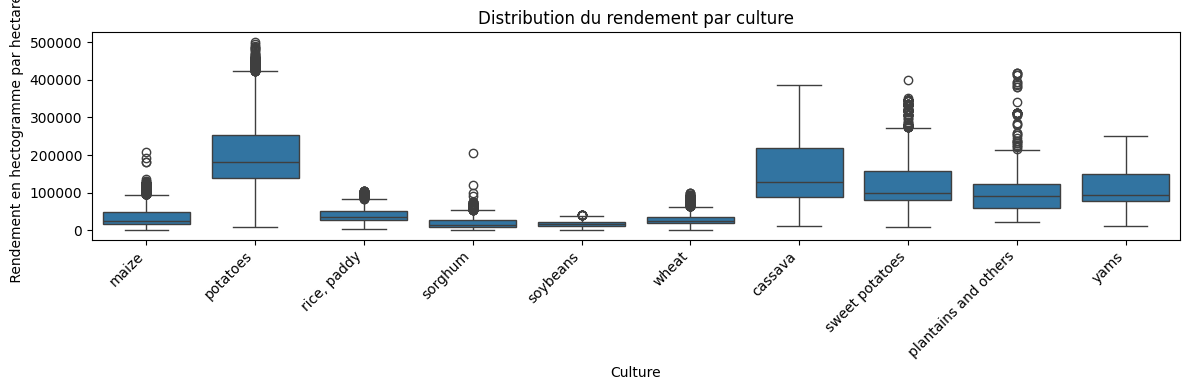

In [139]:
plt.figure(figsize=(12, 4))
sns.boxplot(yield_df, x="item", y="hg/ha_yield")

plt.title("Distribution du rendement par culture")
plt.xlabel("Culture")
plt.ylabel(" Rendement en hectogramme par hectare )")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [140]:
outliers_yield = []
items = yield_df["item"].unique()

for i in items:
    subset = yield_df[yield_df["item"] == i]
    values = subset["hg/ha_yield"]
    
    Q1 = np.quantile(values, 0.25)
    Q3 = np.quantile(values, 0.75)
    iqr = Q3 - Q1
    
    lim_basse = Q1 - 3 * iqr
    lim_haute = Q3 + 3 * iqr
    
    # sélectionner les lignes outliers
    outliers_i = subset[(values < lim_basse) | (values > lim_haute)]
    
    outliers_yield.append(outliers_i)

# concaténer tous les outliers
outliers_yield = pd.concat(outliers_yield, ignore_index=True)


In [141]:
outliers_yield = (
    outliers_yield
    .groupby(["item", "area"])
    .size()
    .reset_index(name="nb_outliers")
    .sort_values(["item", "nb_outliers"], ascending=[True, False])
)
outliers_yield

,item,area,nb_outliers
0,maize,qatar,4
2,plantains and others,guatemala,11
1,plantains and others,el salvador,9
3,plantains and others,suriname,3
4,sorghum,algeria,4
5,sweet potatoes,senegal,1
7,wheat,ireland,7
6,wheat,belgium,2
8,wheat,netherlands,1
9,wheat,new zealand,1


Les outliers que notre méthode détecte ici n’est pas une incohérence de données, mais :

soit des pays structurellement très productifs,

ou des économies agricoles spécialisées dans certaines cultures. Nous allons donc remplacer les valeurs extrêmes par les valeurs du 1er ou 99eme percentile: 

In [142]:
yield_df["value_hg_ha_w"] = (
    yield_df.groupby(["area", "item"])["hg/ha_yield"]
    .transform(lambda x: np.clip(x,
                                 np.quantile(x, 0.01),
                                 np.quantile(x, 0.99)))
)

/Users/fatiza/Library/Caches/pypoetry/virtualenvs/p12-96sEI1FY-py3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:54: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


## Fusion des DF : 

Avant de commencer notre stratégie de fusion, nous allons analyer les similitudes et différences entre les DF : 

In [143]:
print ("yld:", yld.shape)
print("yield_df:", yield_df.shape)
print("pesticides:", pesticides.shape)
print("rain:", rain.shape)
print("temp:", temp.shape)

yld: (26032, 7)
yield_df: (28242, 9)
pesticides: (3860, 4)
rain: (4899, 4)
temp: (8280, 4)


Comme le DF yield_df est le plus enrichi, nous allons commencer par le comparer puis le fusionner avec les autres DF.

Nos clés de fusion sont :  area, area_code, et year

In [144]:
rain_comp = yield_df.merge(
    rain,
    on=["area", "area_code", "year"],
    how="left",
    suffixes=("", "_rain")
)

In [145]:
rain_comp["rain_diff"] = (
    rain_comp["avg_rain_mm"] - rain_comp["average_rain_fall_mm_per_year"]
)

In [146]:
rain_similar = rain_comp[abs(rain_comp["rain_diff"]) < 1e-6]
rain_different = rain_comp[abs(rain_comp["rain_diff"]) >= 1e-6]
print("nombre de valeurs de pluie similaires :", rain_similar.shape)
print("nombre de valeurs de pluie différentes :", rain_different.shape)

nombre de valeurs de pluie similaires : (28242, 11)
nombre de valeurs de pluie différentes : (0, 11)


☑️ Toutes les valeurs de pluie entre de DF yield_df et le DF rain sont similaires.

☑️ Nous gardons donc les données disponibles sur le DF yield_df

In [147]:
pest_comp = yield_df.merge(
    pesticides,
    on=["area", "area_code", "year"],
    how="left",
    suffixes=("", "_pest")
)

In [148]:
pest_comp["pest_diff"] = (
    pest_comp["pesticides_tonnes"] - pest_comp["tonnes_pesticides"]
)

In [149]:
pest_similar = pest_comp[abs(pest_comp["pest_diff"]) < 1e-6]
pest_different = pest_comp[abs(pest_comp["pest_diff"]) >= 1e-6]
print("nombre de valeurs de pesticides similaires :", pest_similar.shape)
print("nombre de valeurs de pesticides différentes :", pest_different.shape)

nombre de valeurs de pesticides similaires : (28242, 11)
nombre de valeurs de pesticides différentes : (0, 11)


☑️ Les valeurs de pesticides sont identiques sur les deux DF ( yield_df et pesticides).

☑️ Nous allons donc garder les valeurs disponibles sur le DF yield_df

In [150]:
temp_comp = yield_df.merge(
    temp,
    on=["area", "area_code", "year"],
    how="left",
    suffixes=("", "_temp")
)

In [151]:
temp_comp["temp_diff"] = (
    temp_comp["avg_temp"] - temp_comp["avg_temp_temp"]
)

In [152]:
temp_similar = temp_comp[abs(temp_comp["temp_diff"]) < 1e-6]
temp_different = temp_comp[abs(temp_comp["temp_diff"]) >= 1e-6]
print("nombre de valeurs de température similaires :", temp_similar.shape)
print("nombre de valeurs de température différentes :", temp_different.shape)

nombre de valeurs de température similaires : (33296, 11)
nombre de valeurs de température différentes : (152798, 11)


In [153]:
print(temp_comp["avg_temp"].describe())
print(temp_comp["avg_temp_temp"].describe())

count    186094.000000
mean         22.996121
std           5.072132
min           1.300000
25%          20.310000
50%          25.360000
75%          26.400000
max          30.650000
Name: avg_temp, dtype: float64
count    186094.000000
mean         22.996121
std           5.072132
min           1.300000
25%          20.310000
50%          25.360000
75%          26.400000
max          30.650000
Name: avg_temp_temp, dtype: float64


Nous allons creuser un peu plus, car près de 82% des valeurs de températures ne sont pas similaires, en revanches les statistiques descriptives des deux variables sont identiques.
Analysons un pays et voyons les différences.

In [154]:
temp_comp.loc[(temp_comp["area"]== "india") & (temp_comp["year"] == 1990)]

,area,item,year,hg/ha_yield,avg_rain_mm,pesticides_tonnes,avg_temp,area_code,value_hg_ha_w,avg_temp_temp,temp_diff
44640,india,cassava,1990,205381,1083.0,75000.0,25.58,100,205381.0,25.58,0.00
44641,india,cassava,1990,205381,1083.0,75000.0,25.58,100,205381.0,26.88,-1.30
44642,india,cassava,1990,205381,1083.0,75000.0,25.58,100,205381.0,25.79,-0.21
44643,india,cassava,1990,205381,1083.0,75000.0,25.58,100,205381.0,24.10,1.48
44644,india,cassava,1990,205381,1083.0,75000.0,25.58,100,205381.0,25.25,0.33
...,...,...,...,...,...,...,...,...,...,...,...
48507,india,wheat,1990,21211,1083.0,75000.0,25.64,100,21211.0,26.59,-0.95
48508,india,wheat,1990,21211,1083.0,75000.0,25.64,100,21211.0,24.37,1.27
48509,india,wheat,1990,21211,1083.0,75000.0,25.64,100,21211.0,26.63,-0.99
48510,india,wheat,1990,21211,1083.0,75000.0,25.64,100,21211.0,26.63,-0.99


Nous remarquons que les valeurs provenant du DF temp contiennent des valeurs de température différente pour la même année et le même pays.
Nous allons les remplacer par la moyenne de ces valeurs, et recalculer la différence entre les 2 variables.

In [155]:
temp.loc[(temp["area"]== "india") & (temp["year"] == 1990)]

,year,area,avg_temp,area_code
1249,1990,india,25.58,100.0
1467,1990,india,26.88,100.0
2634,1990,india,25.79,100.0
3026,1990,india,24.10,100.0
6561,1990,india,25.25,100.0
9726,1990,india,25.44,100.0
18638,1990,india,25.54,100.0
24764,1990,india,26.36,100.0
26340,1990,india,26.91,100.0
27205,1990,india,25.16,100.0


In [156]:
temp["avg_temp"] = (temp
    .groupby(["area", "area_code", "year"])["avg_temp"]
    .transform("mean")
)

/var/folders/dr/49f4526j7cg4l2f1m55kc8x40000gn/T/ipykernel_23115/1313197646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["avg_temp"] = (temp


In [157]:
temp_comp = yield_df.merge(
    temp,
    on=["area", "area_code", "year"],
    how="left",
    suffixes=("", "_clean")
)

In [158]:
temp_comp.head()

,area,item,year,hg/ha_yield,avg_rain_mm,pesticides_tonnes,avg_temp,area_code,value_hg_ha_w,avg_temp_clean
0,albania,maize,1990,36613,1485.0,121.0,16.37,3,36613.00,16.37
1,albania,potatoes,1990,66667,1485.0,121.0,16.37,3,69120.22,16.37
2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37,3,23489.15,16.37
3,albania,sorghum,1990,12500,1485.0,121.0,16.37,3,12383.34,16.37
4,albania,soybeans,1990,7000,1485.0,121.0,16.37,3,7000.00,16.37


In [159]:
temp_comp["temp_diff"] = (
    temp_comp["avg_temp"] - temp_comp["avg_temp_clean"]
)

In [160]:
temp_similar = temp_comp[abs(temp_comp["temp_diff"]) < 1e-6]
temp_different = temp_comp[abs(temp_comp["temp_diff"]) >= 1e-6]
print("nombre de valeurs de température similaires :", temp_similar.shape)
print("nombre de valeurs de température différentes :", temp_different.shape)

nombre de valeurs de température similaires : (9945, 11)
nombre de valeurs de température différentes : (176149, 11)


Notre tentative d'harmonisation des température n'a pas fonctionné. Nous allons vérifier combien de valeurs incohérentes nous avons : 

In [161]:
temp_variation = (
    yield_df
    .groupby(["area", "area_code", "year"])["avg_temp"]
    .nunique()
)

In [162]:
diff_temp = temp_variation[temp_variation > 1]
diff_temp.shape[0]

575

575 couples (area, area_code, year) présentent plus d’une valeur de température différente dans yield_df.
Nous allons remplacer ces valeurs par leur moyenne et on refait l'opération merge : 

In [163]:
yield_df["avg_temp"] = (
    yield_df
    .groupby(["area", "area_code", "year"])["avg_temp"]
    .transform("mean")
)

In [164]:
temp_comp = yield_df.merge(
    temp,
    on=["area", "area_code", "year"],
    how="left",
    suffixes=("", "_temp")
)

In [165]:
temp_comp["temp_diff"] = (
    temp_comp["avg_temp"] - temp_comp["avg_temp_temp"]
)

In [166]:
temp_similar = temp_comp[abs(temp_comp["temp_diff"]) < 1e-6]
temp_different = temp_comp[abs(temp_comp["temp_diff"]) >= 1e-6]
print("nombre de valeurs de température similaires :", temp_similar.shape)
print("nombre de valeurs de température différentes :", temp_different.shape)

nombre de valeurs de température similaires : (186094, 11)
nombre de valeurs de température différentes : (0, 11)


☑️ Toutes les valeurs sont désormais similaires. Nous garderons donc celle du DF yield_df

In [167]:
yield_df.head()

,area,item,year,hg/ha_yield,avg_rain_mm,pesticides_tonnes,avg_temp,area_code,value_hg_ha_w
0,albania,maize,1990,36613,1485.0,121.0,16.37,3,36613.00
1,albania,potatoes,1990,66667,1485.0,121.0,16.37,3,69120.22
2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37,3,23489.15
3,albania,sorghum,1990,12500,1485.0,121.0,16.37,3,12383.34
4,albania,soybeans,1990,7000,1485.0,121.0,16.37,3,7000.00


☑️ Nous allons ajouter à notre DF yield_df le item_code disponible sur le DF yld : 

In [168]:
yld.head()

,area_code,area,item_code,item,year,value_hg/ha,value_hg_ha_w
29,2,afghanistan,56,Maize,1990,17582,17582.0
30,2,afghanistan,56,Maize,1991,16800,16800.0
31,2,afghanistan,56,Maize,1992,15000,15000.0
32,2,afghanistan,56,Maize,1993,16786,16786.0
33,2,afghanistan,56,Maize,1994,16667,16667.0


In [169]:
# on s'assure que nous avons bien un code unique par item :
yld.groupby("item")["item_code"].nunique()

item
Cassava                 1
Maize                   1
Plantains and others    1
Potatoes                1
Rice, paddy             1
Sorghum                 1
Soybeans                1
Sweet potatoes          1
Wheat                   1
Yams                    1
Name: item_code, dtype: int64

In [170]:
item_code_df = (
    yld
    .groupby("item", as_index=False)["item_code"]
    .first()
)

Voici le code relatif à chaque item : 

In [171]:
item_code_df

,item,item_code
0,Cassava,125
1,Maize,56
2,Plantains and others,489
3,Potatoes,116
4,"Rice, paddy",27
5,Sorghum,83
6,Soybeans,236
7,Sweet potatoes,122
8,Wheat,15
9,Yams,137


In [172]:
yield_df.item.value_counts()

item
potatoes                4276
maize                   4121
wheat                   3857
rice, paddy             3388
soybeans                3223
sorghum                 3039
sweet potatoes          2890
cassava                 2045
yams                     847
plantains and others     556
Name: count, dtype: int64

In [173]:
item_code_map = {
    "cassava": 125,
    "maize": 56,
    "plantains and others": 489,
    "potatoes": 116,
    "rice, paddy": 27,
    "sorghum": 83,
    "soybeans": 236,
    "sweet potatoes": 122,
    "wheat": 15,
    "yams": 137
}

In [174]:
yield_df["item_code"] = yield_df["item"].map(item_code_map)

In [175]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               28242 non-null  object 
 1   item               28242 non-null  object 
 2   year               28242 non-null  int64  
 3   hg/ha_yield        28242 non-null  int64  
 4   avg_rain_mm        28242 non-null  float64
 5   pesticides_tonnes  28242 non-null  float64
 6   avg_temp           28242 non-null  float64
 7   area_code          28242 non-null  int64  
 8   value_hg_ha_w      28242 non-null  float64
 9   item_code          28242 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 2.4+ MB


☑️ item_code ajouté et absence de valeurs manquantes.

In [176]:
yield_df = yield_df.drop(columns=["hg/ha_yield"])

In [177]:
yield_df = yield_df.rename(columns={"value_hg_ha_w":"hg/ha_yield"})

Voici la version finale de notre dataframe à utiliser pour la modélisation : 

In [178]:
print(yield_df.shape)
yield_df.head()

(28242, 9)


,area,item,year,avg_rain_mm,pesticides_tonnes,avg_temp,area_code,hg/ha_yield,item_code
0,albania,maize,1990,1485.0,121.0,16.37,3,36613.00,56
1,albania,potatoes,1990,1485.0,121.0,16.37,3,69120.22,116
2,albania,"rice, paddy",1990,1485.0,121.0,16.37,3,23489.15,27
3,albania,sorghum,1990,1485.0,121.0,16.37,3,12383.34,83
4,albania,soybeans,1990,1485.0,121.0,16.37,3,7000.00,236


Nous allons maintenant essayer de généraliser Fertilizer_Used et Irrigation_Used à notre DF yield_df : 

In [179]:
crop_yield.head()

,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
26,Wheat,615.349204,27.755632,True,False,4.876587
27,Barley,334.728576,31.137047,True,True,4.459294
28,Maize,259.418125,17.261892,False,False,2.338541
29,Wheat,786.770103,23.199371,True,True,6.937589
30,Maize,609.798764,38.265851,True,False,5.113588


In [180]:
df = crop_yield.copy()

df["rain_level"] = pd.qcut(df["Rainfall_mm"], q=3, labels=["low", "medium", "high"])
df["temp_level"] = pd.qcut(df["Temperature_Celsius"], q=3, labels=["low", "medium", "high"])
df["yield_level"] = pd.qcut(df["Yield_tons_per_hectare"], q=3, labels=["low", "medium", "high"])

In [181]:
analysis_yield = (
    df
    .groupby(["Crop", "yield_level"])
    .agg(
        irrigation_rate=("Irrigation_Used", "mean"),
        fertilizer_rate=("Fertilizer_Used", "mean"),
        n_obs=("Yield_tons_per_hectare", "size")
    )
    .reset_index()
)

/var/folders/dr/49f4526j7cg4l2f1m55kc8x40000gn/T/ipykernel_23115/2104174668.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Crop", "yield_level"])


In [182]:
analysis_yield

,Crop,yield_level,irrigation_rate,fertilizer_rate,n_obs
0,Barley,low,0.314458,0.262260,55769
1,Barley,medium,0.499331,0.497413,55284
2,Barley,high,0.685516,0.738975,55669
3,Cotton,low,0.311958,0.264307,55655
4,Cotton,medium,0.502602,0.502331,55340
5,Cotton,high,0.684645,0.735989,55547
6,Maize,low,0.312741,0.262831,55861
7,Maize,medium,0.499784,0.501942,55626
8,Maize,high,0.689616,0.733326,55296
9,Rice,low,0.307659,0.265574,55412


Nous constatons que l'effet de l'utilisation de l'irrigation ou der fertilisants est exactement le même pour toutes les cultures sans différence, et que le nombre des observations est également équivalent.

- Pour les rendements importants : 
    - **68% des observations utilisent l'irrigation**
    - **74% des observations utilisent la fertilisations**

- Pour les rendements faibles : 
    - **31% des observations utilisent l'irrigation**
    - **26% des observations utilisent la fertilisations**

- Pour les rendements moyens, les valeur sont de 50% pour les deux variables.





    


Pour Analyser l'effet de l'irrigation et de la fertilisation sur le rendement, nous allons utiliser le modèle de régression linéaire multiple(OLS) pour expliquer le rendement agricole à partir des autres variables. Cela permettra d'estimer les coefficients par moindres carrés ordinaires : 

In [183]:
import statsmodels.formula.api as smf

model = smf.ols(
    "Yield_tons_per_hectare ~ Rainfall_mm + Temperature_Celsius + Irrigation_Used + Fertilizer_Used + C(Crop)",
    data=crop_yield
).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.913
Model:                                OLS   Adj. R-squared:                  0.913
Method:                     Least Squares   F-statistic:                 1.165e+06
Date:                    Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                            22:48:18   Log-Likelihood:            -7.2584e+05
No. Observations:                  999743   AIC:                         1.452e+06
Df Residuals:                      999733   BIC:                         1.452e+06
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Nous constatons que : 

- Qualité globale du modèle très satisfaisante  : 
    - R² = 0.913
    - 91,3 % de la variance du rendement est expliquée par le modèle
    - R² ajusté = 0.913 Presque identique au  R² donc pas de sur-ajustement
    - Concrêtement 91,3 % de la variance du rendement est expliquée par : pluie, température, irrigation, fertilisation,type de culture.

    - C’est très élevé : le modèle est prédictivement très solide.


- Interpétation des résultats pour **Irrigation** : 
    - coef = 1.1996
    - IC 95% = [1.198 ; 1.202]
    - p-value < 0.001
    - **À pluie, température et culture constantes : l’irrigation augmente le rendement de ≈ +1.20 t/ha.**


- Interpétation des résultats pour **Fertilisation** : 
    - coef = 1.5004
    - IC 95% = [1.498 ; 1.502]
    - p-value < 0.001
    - **À conditions identiques : la fertilisation augmente le rendement de ≈ +1.50 t/ha.**

**Hypothèses à retenir pour notre modélisation :**

**coef_irrigation = 12 000 hg/ha** (1.20 t/ha)

**coef_fertilization  = 15 000 hg/ha** (1.50 t/ha)


## Sauvegarde du DF final :

In [184]:
yield_df.head()

,area,item,year,avg_rain_mm,pesticides_tonnes,avg_temp,area_code,hg/ha_yield,item_code
0,albania,maize,1990,1485.0,121.0,16.37,3,36613.00,56
1,albania,potatoes,1990,1485.0,121.0,16.37,3,69120.22,116
2,albania,"rice, paddy",1990,1485.0,121.0,16.37,3,23489.15,27
3,albania,sorghum,1990,1485.0,121.0,16.37,3,12383.34,83
4,albania,soybeans,1990,1485.0,121.0,16.37,3,7000.00,236


In [185]:
print("================ DATASET SUMMARY =================")
print(f"Nombre de pays : {yield_df['area'].nunique()}")
print(f"Nombre de cultures : {yield_df['item'].nunique()}")
print(f"Période couverte : {yield_df['year'].min()} → {yield_df['year'].max()}")
print(f"Nombre total d'observations : {yield_df.shape[0]}")
print("Observations moyennes par pays :", int(yield_df.shape[0] / yield_df['area'].nunique()))
print("Observations moyennes par culture :", int(yield_df.shape[0] / yield_df['item'].nunique()))


================ DATASET SUMMARY =================
Nombre de pays : 101
Nombre de cultures : 10
Période couverte : 1990 → 2013
Nombre total d'observations : 28242
Observations moyennes par pays : 279
Observations moyennes par culture : 2824


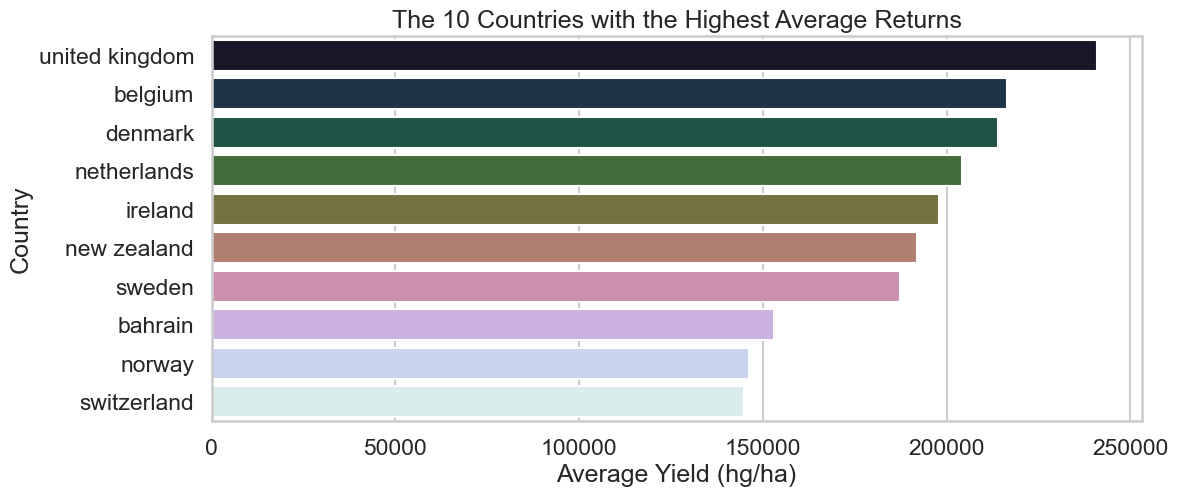

In [211]:
plt.figure(figsize=(12,5))
top_countries = yield_df.groupby('area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,  palette="cubehelix", hue=top_countries.index, )
plt.title("The 10 Countries with the Highest Average Returns")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Country")
plt.show()

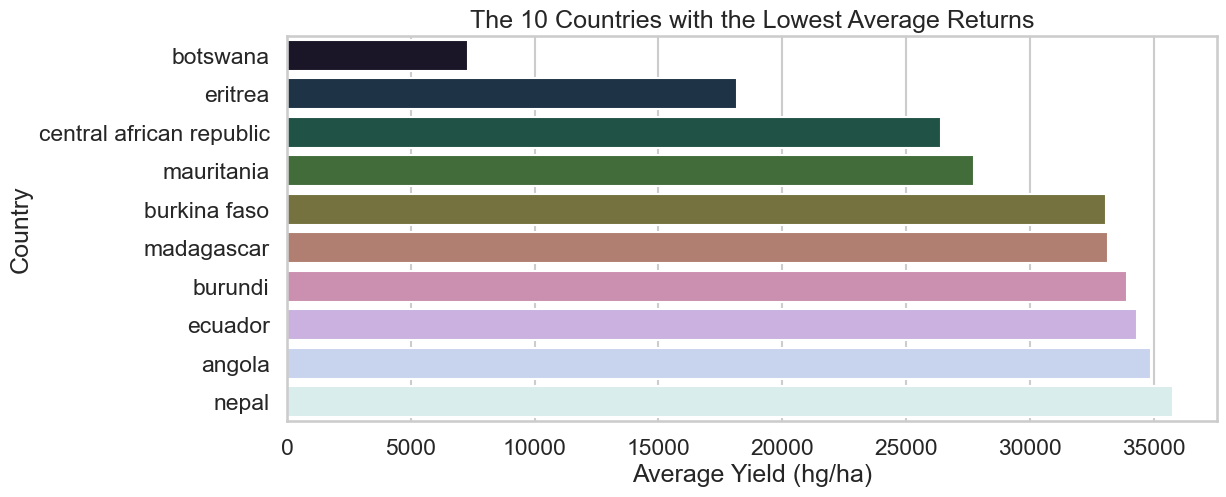

In [210]:
plt.figure(figsize=(12,5))
top_countries = yield_df.groupby('area')['hg/ha_yield'].mean().sort_values(ascending=True).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,  palette="cubehelix", hue=top_countries.index, )
plt.title("The 10 Countries with the Lowest Average Returns")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Country")
plt.show()

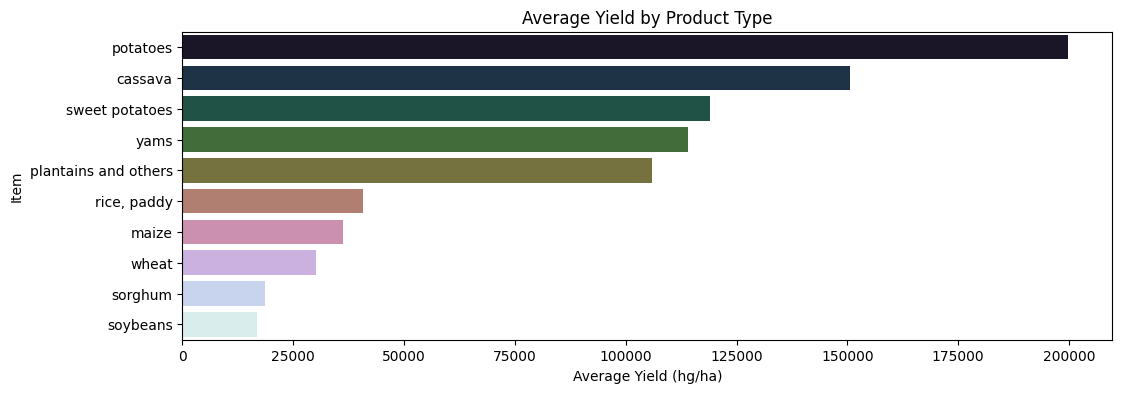

In [ ]:
plt.figure(figsize=(12,4))
top_items = yield_df.groupby('item')['hg/ha_yield'].mean().sort_values(ascending=False)
sns.barplot(x=top_items.values, y=top_items.index, palette="cubehelix", hue=top_items.index)
plt.title("Average Yield by Product Type")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Item")
plt.show()

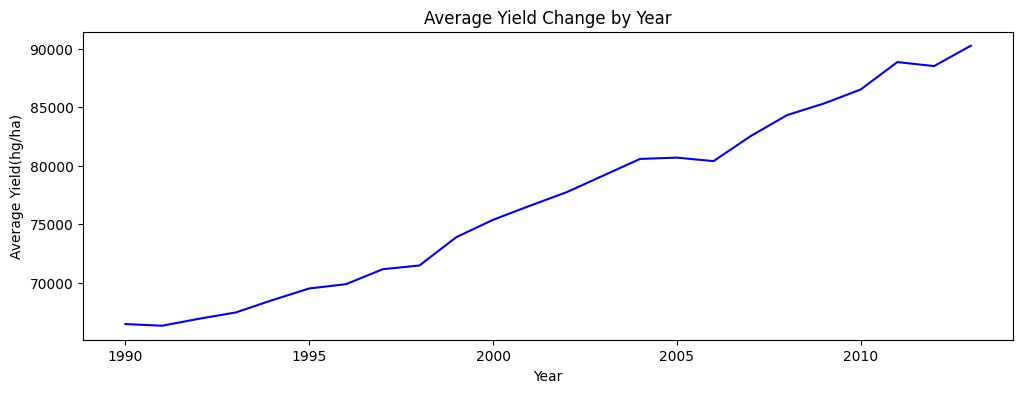

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(data=yield_df, x="year", y="hg/ha_yield", errorbar=None, color="blue")
plt.title("Average Yield Change by Year")
plt.xlabel("Year")
plt.ylabel("Average Yield(hg/ha)")
plt.show()

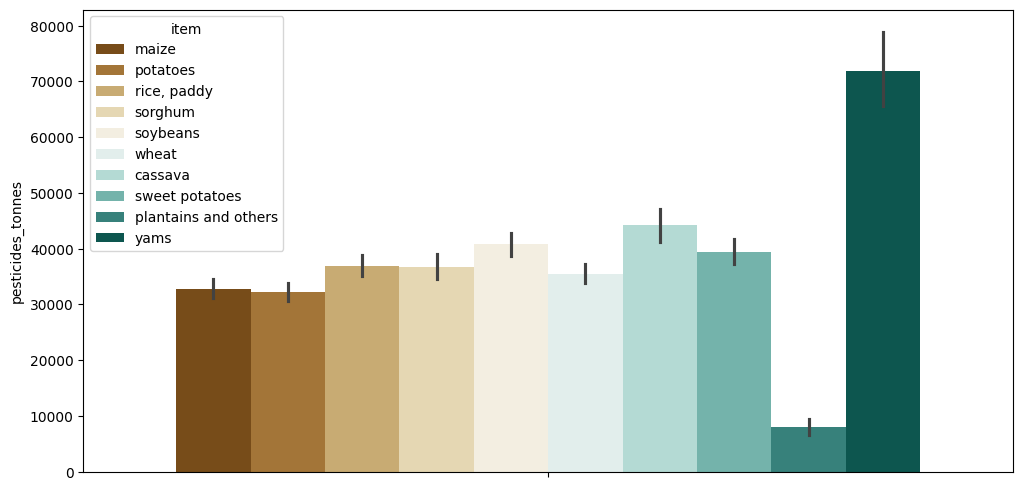

In [202]:
plt.figure(figsize=(12,6))
sns.barplot(data=yield_df, hue = yield_df.item, y = yield_df['pesticides_tonnes'],palette='BrBG', legend=True)
plt.xticks(rotation=90)
plt.show()

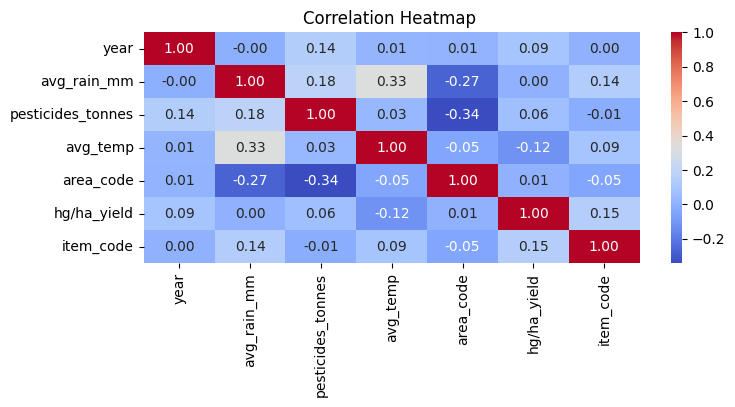

In [189]:
plt.figure(figsize=(8,3))
sns.heatmap(yield_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap ")
plt.show()

In [190]:
#Sauvegarde : 
yield_df.to_csv(OUTPUTS_DIR / "clean_data.csv", index=False)

**=================================================================================================**